# Import Libraries

In [1]:
#basic libraries: numpy and pandas for data handling, pyplot 
#and seaborn for visualization, math for mathematical operations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from math import ceil


#sklearn libraries: preprocessing for data preprocessing,
#model_selection for model selection, metrics for model evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV,KFold
from sklearn.metrics import classification_report, precision_score, recall_score,\
                            accuracy_score, confusion_matrix, roc_curve, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression, LassoCV, SGDClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier,\
                            VotingClassifier, BaggingClassifier, StackingClassifier, AdaBoostClassifier,\
                            HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
#import training data
train_demo = pd.read_excel('train_demo.xlsx')
train_health = pd.read_excel('train_health.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')

#merge training data
test_demo = pd.read_excel('test_demo.xlsx')
test_health = pd.read_excel('test_health.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')

In [3]:
# Change the data frames index to the access ID of each entry, rather than the standard index
data_df = [train_demo, train_health, train_habits, test_demo, test_health, test_habits]

for d in data_df:
    d.set_index('PatientID', inplace = True)

In [4]:
# Create train and test datasets concatenating all datasets.
train_data = pd.concat([train_demo,train_habits,train_health], axis = 1)
test_data = pd.concat([test_demo,test_habits,test_health], axis = 1)

# Data Exploration

## Data fields

### Sociodemographic Data
-   PatientID - The unique identifier of the patient
-   Birth_Year - Patient Year of Birth
-   Name - Name of the patient
-   Region - Patient Living Region
-   Education - Answer to the question: What is the highest grade or year of school you have?
-   Disease - The dependent variable. If the patient has the disease (Disease = 1) or not (Disease = 0)

### Health Related Data
-   PatientID - The unique identifier of the patient
-   Height - Patient's height
-   Weight - Patient's weight
-   Checkup - Answer to the question: How long has it been since you last visited a doctor for a routine Checkup? [A routine Checkup is a general physical exam, not an exam for a specific injury, illness, or condition.]
-   Diabetes - Answer to the question: (Ever told) you or your direct relatives have diabetes?
-   High_Cholesterol - Cholesterol value
-   Blood_Pressure - Blood Pressure in rest value
-   Mental Health - Answer to the question: During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?
-   Physical Health - Answer to the question: Thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good to the point where it was difficult to walk?

### Habits Related Data
-   PatientID - The unique identifier of the patient
-   Smoking_Habit - Answer to the question: Do you smoke more than 10 cigars daily?
-   Drinking_Habit - Answer to the question: What is your behavior concerning alcohol consumption?
-   Exercise - Answer to the question: Do you exercise (more than 30 minutes) 3 times per week or more?
-   Fruit_Habit - Answer to the question: How many portions of fruits do you consume per day?
-   Water_Habit - Answer to the question: How much water do you drink per day?

In [5]:
# Display the first 2 rows of the training data
train_data.head(2)

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.


In [6]:
# Display the first 2 rows of the test data
test_data.head(2)

,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1343,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade),Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline di...
1727,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,171,80,225,130,21,0,Not sure,I do have diabetes


## Exploratory Data Analysis

In [7]:
# Print how many observations and features are in the training data
print('There are {} observations and {} features in the training data'.format(train_data.shape[0], train_data.shape[1]))

There are 800 observations and 18 features in the training data


In [8]:
# Presenting all the columns in the training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

In [9]:
# Presenting all the columns in the test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 1343 to 1757
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              225 non-null    object
 1   Birth_Year        225 non-null    int64 
 2   Region            225 non-null    object
 3   Education         225 non-null    object
 4   Smoking_Habit     225 non-null    object
 5   Drinking_Habit    225 non-null    object
 6   Exercise          225 non-null    object
 7   Fruit_Habit       225 non-null    object
 8   Water_Habit       225 non-null    object
 9   Height            225 non-null    int64 
 10  Weight            225 non-null    int64 
 11  High_Cholesterol  225 non-null    int64 
 12  Blood_Pressure    225 non-null    int64 
 13  Mental_Health     225 non-null    int64 
 14  Physical_Health   225 non-null    int64 
 15  Checkup           225 non-null    object
 16  Diabetes          225 non-null    object
dtypes: int64(7),

## Features Distributions

### Categorical

|                          |   Region |
|:-------------------------|---------:|
| East Midlands            |      154 |
| London                   |      136 |
| South West               |      107 |
| West Midlands            |       89 |
| South East               |       84 |
| East of England          |       80 |
| Yorkshire and the Humber |       64 |
| North West               |       59 |
| North East               |       22 |
| LONDON                   |        5 |


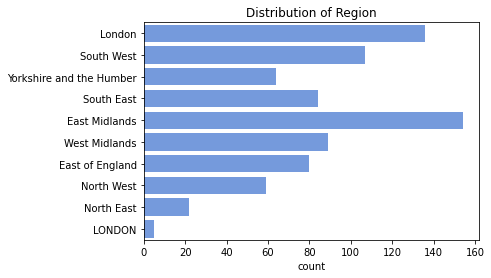

---------------------------------------------------------------------------------------------
|                                             |   Education |
|:--------------------------------------------|------------:|
| University Complete (3 or more years)       |         239 |
| High School Graduate                        |         196 |
| Elementary School (1st to 9th grade)        |         183 |
| High School Incomplete (10th to 11th grade) |         102 |
| University Incomplete (1 to 2 years)        |          37 |
| I never attended school / Other             |          30 |


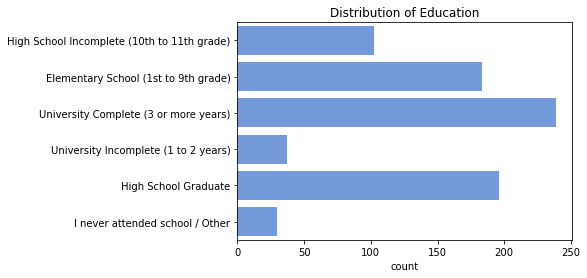

---------------------------------------------------------------------------------------------
|     |   Smoking_Habit |
|:----|----------------:|
| No  |             673 |
| Yes |             127 |


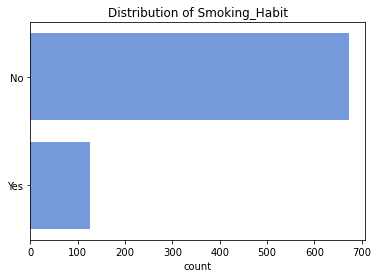

---------------------------------------------------------------------------------------------
|                                      |   Drinking_Habit |
|:-------------------------------------|-----------------:|
| I usually consume alcohol every day  |              406 |
| I consider myself a social drinker   |              383 |
| I do not consume any type of alcohol |               11 |


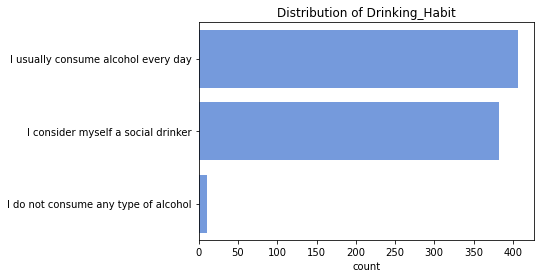

---------------------------------------------------------------------------------------------
|     |   Exercise |
|:----|-----------:|
| No  |        536 |
| Yes |        264 |


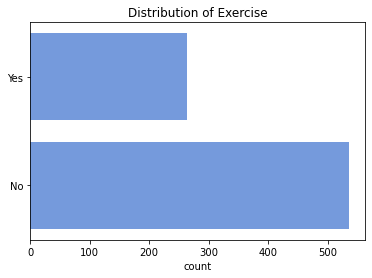

---------------------------------------------------------------------------------------------
|                                                 |   Fruit_Habit |
|:------------------------------------------------|--------------:|
| Less than 1. I do not consume fruits every day. |           452 |
| 1 to 2 pieces of fruit in average               |           175 |
| 3 to 4 pieces of fruit in average               |           105 |
| 5 to 6 pieces of fruit in average               |            56 |
| More than six pieces of fruit                   |            12 |


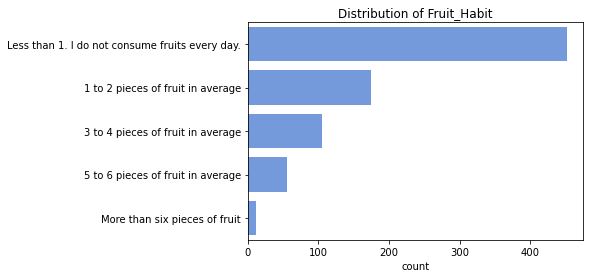

---------------------------------------------------------------------------------------------
|                                                |   Water_Habit |
|:-----------------------------------------------|--------------:|
| Between one liter and two liters               |           364 |
| More than half a liter but less than one liter |           352 |
| Less than half a liter                         |            84 |


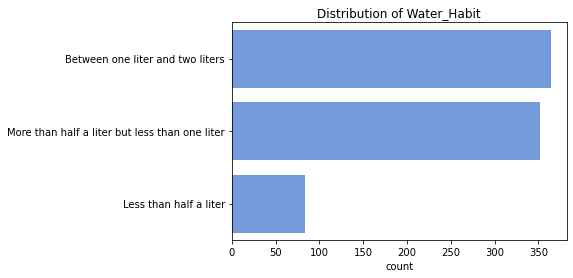

---------------------------------------------------------------------------------------------
|                                        |   Checkup |
|:---------------------------------------|----------:|
| More than 3 years                      |       429 |
| Not sure                               |       312 |
| Less than 3 years but more than 1 year |        53 |
| Less than three months                 |         6 |


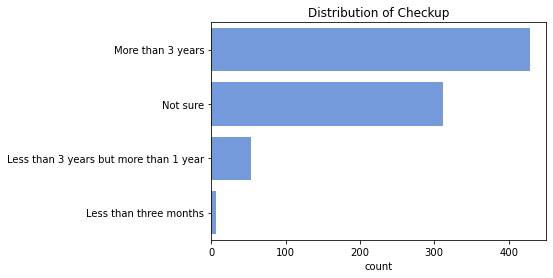

---------------------------------------------------------------------------------------------
|                                                                            |   Diabetes |
|:---------------------------------------------------------------------------|-----------:|
| Neither I nor my immediate family have diabetes.                           |        392 |
| I have/had pregnancy diabetes or borderline diabetes                       |        206 |
| I do have diabetes                                                         |        144 |
| I don't have diabetes, but I have direct family members who have diabetes. |         58 |


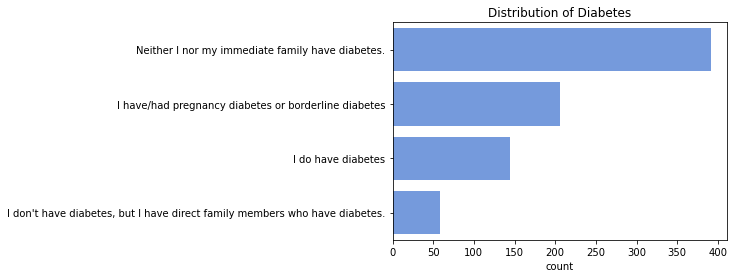

---------------------------------------------------------------------------------------------


In [10]:
# Print value counts for each category and plot the distribution of the feature
# Select only the categorical features except name feature
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O' and feature not in ['Name']]

for col in train_data[categorical_features]:
    print(train_data[col].value_counts().to_markdown())
    plt.title('Distribution of {}'.format(col))
    sns.countplot(y = col, data = train_data[categorical_features], color = 'cornflowerblue')
    plt.ylabel('')
    plt.show()
    print('---------------------------------------------------------------------------------------------')

### Numerical

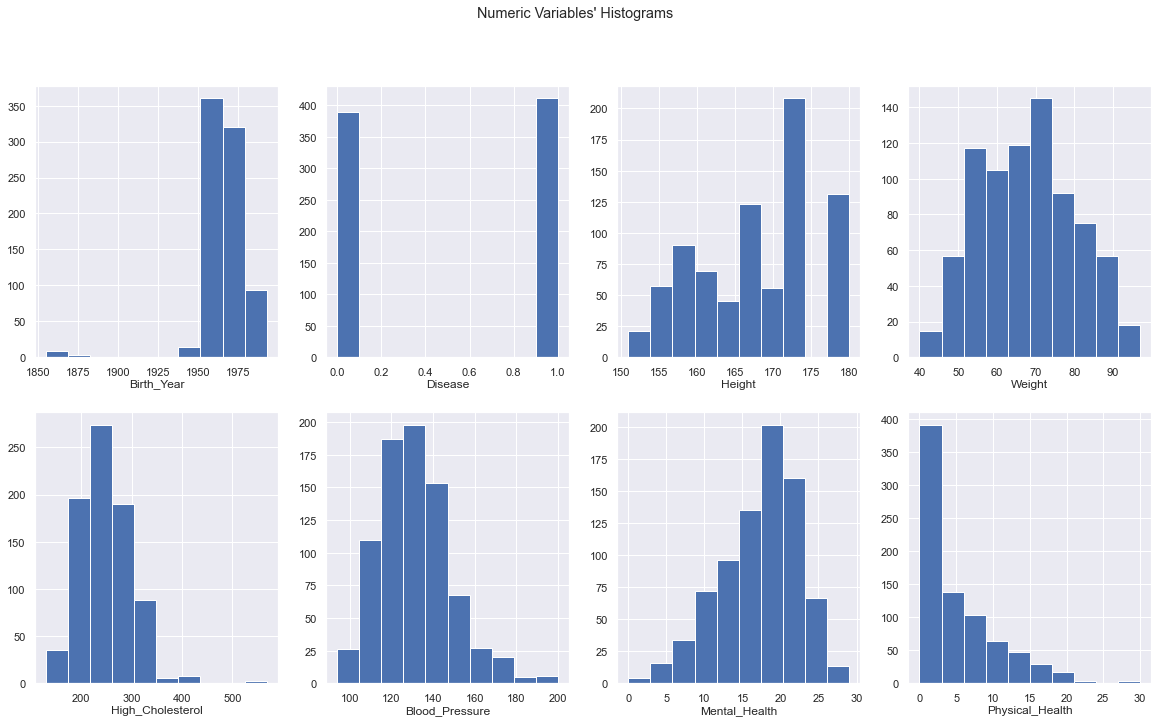

In [11]:
# Plot all the numerical features distribution in one plot
# Select only the numerical features
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']

# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(numerical_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), numerical_features):
    ax.hist(train_data[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

## Duplicated rows

In [12]:
# Find out if there are any missing values in the training data
if train_data.duplicated().sum() > 0:
    print('There are duplicated data in the training data')
else:
    print('There are no duplicated data in the training data')


There are no duplicated data in the training data


## Coherence Check

In [13]:
# Find out if there is duplicated index in the training data
if train_data.index.is_unique == True:
    print('PatientID is unique in the training data')
else:
    print('PatientID is not unique in the training data')

PatientID is unique in the training data


In [14]:
# Find out if there is duplicated names in the training data
if train_data['Name'].is_unique == True:
    print('Name is unique in the training data')
else:
    print('Name is not unique in the training data')

Name is not unique in the training data


In [15]:
# Show duplicated Name rows
train_data[train_data['Name'].duplicated(keep = False)]

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1221,Mr. Gary Miller,1959,North West,University Complete (3 or more years),0,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,Less than half a liter,172,65,258,130,17,6,Not sure,Neither I nor my immediate family have diabetes.
1694,Mr. Gary Miller,1983,South West,I never attended school / Other,0,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,178,61,223,118,15,5,Not sure,Neither I nor my immediate family have diabetes.


Even though Name has duplicated values, is not a problem because these two rows are different people with the same name.

In [16]:
# if in Mental_Health feature exists values greater than 30
if train_data['Mental_Health'].max() > 30:
    print('There are values greater than 30 in Mental_Health feature')
else:
    print('There are no values greater than 30 in Mental_Health feature')

There are no values greater than 30 in Mental_Health feature


In [17]:
# if in Physical_Health feature exists values greater than 30
if train_data['Physical_Health'].max() > 30:
    print('There are values greater than 30 in Physical_Health feature')
else:
    print('There are no values greater than 30 in Physical_Health feature')

There are no values greater than 30 in Physical_Health feature


## Outliers

In [18]:
# Define metric and non-metric datasets
metric = train_data.drop(columns='Disease').select_dtypes(include=np.number)
non_metric = train_data.select_dtypes(exclude=np.number)

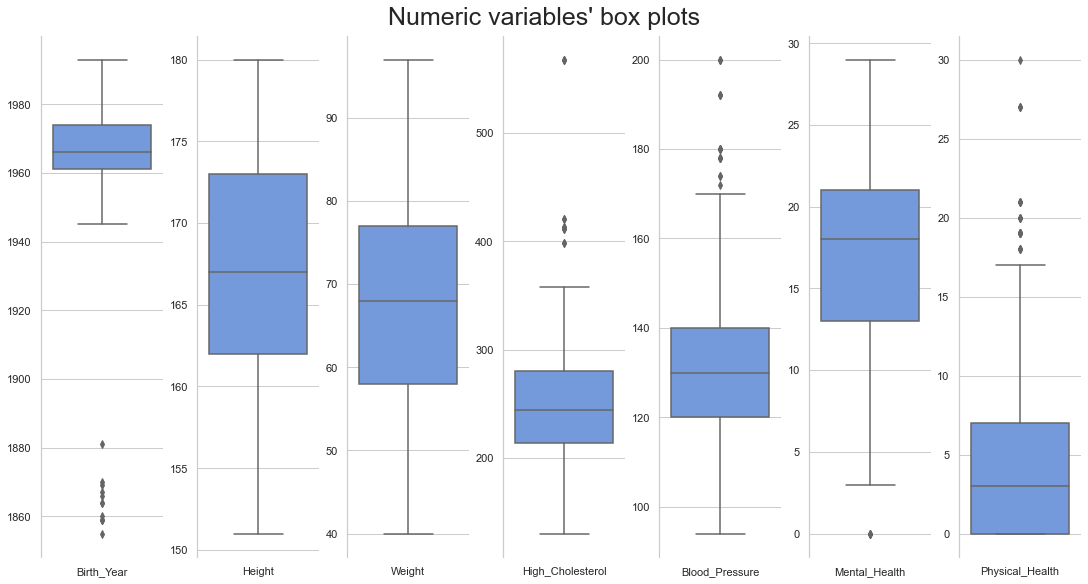

In [19]:
# Box plots for the numeric variables
sns.set(style="whitegrid")

data = pd.melt(metric)
plot_features = metric.columns

#Prepare figure layout
fig, axes = plt.subplots(1, len(plot_features), figsize=(15,8), constrained_layout=True)
    
# Draw the boxplots
for i in zip(axes, plot_features):
    sns.boxplot(x="variable", y="value", data=data.loc[data["variable"]==i[1]], ax=i[0], color='cornflowerblue')
    i[0].set_xlabel("")
    i[0].set_ylabel("")

# Finalize the plot
plt.suptitle("Numeric variables' box plots", fontsize=25)
sns.despine(bottom=True)

plt.show()

# Data Preprocesing

## Outliers Treatment

### Detection Methods

In [20]:
# Outlier detection for Mental Health feature using IQR method
def outlier_detection_iqr(data, feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

In [21]:
# Mean and stardard deviation method for outlier detection
def outlier_detection_normal(data, feature):
    mean = data[feature].mean()
    std = data[feature].std()
    lower = mean - 3 * std
    upper = mean + 3 * std
    return lower, upper

In [22]:
def printoutliers(listoutliers, feature):
# porcentage of outliers in high cholesterol feature over the total number of observations
    print('There are {} outliers in {} feature, which is {}% of the total number of observations'\
    .format(len(listoutliers), feature, round(len(listoutliers) / len(train_data) * 100, 2)))

### Birth Year Feature

In [23]:
# Outlier detection for Birth_Year feature
lower, upper = outlier_detection_iqr(train_data, 'Birth_Year')

# Outliers in Birth_Year feature
outliers_birth_year = train_data[(train_data['Birth_Year'] < lower) | (train_data['Birth_Year'] > upper)]

# Create a list of outliers indexes
outliers_birth_year_index_iqr = outliers_birth_year.index

#call the function printoutliers
printoutliers(outliers_birth_year_index_iqr, 'Birth_Year')

There are 12 outliers in Birth_Year feature, which is 1.5% of the total number of observations


In [24]:
# Outlier detection for Birth_Year feature
lower, upper = outlier_detection_normal(train_data, 'Birth_Year')

# Outliers in Birth_Year feature
outliers_birth_year = train_data[(train_data['Birth_Year'] < lower) | (train_data['Birth_Year'] > upper)]

# Create a list of outliers indexes
outliers_birth_year_index_norm = outliers_birth_year.index

#call the function printoutliers
printoutliers(outliers_birth_year_index_norm, 'Birth_Year')

There are 12 outliers in Birth_Year feature, which is 1.5% of the total number of observations


### High Cholesterol Feature

In [25]:
# Outlier detection for High Cholesterol feature
lower, upper = outlier_detection_iqr(train_data, 'High_Cholesterol')

# Outliers in high cholesterol feature
outliers_high_ch = train_data[(train_data['High_Cholesterol'] < lower) | (train_data['High_Cholesterol'] > upper)]

# Create a list of outliers indexes
outliers_high_ch_index_iqr = outliers_high_ch.index

#call the function printoutliers
printoutliers(outliers_high_ch_index_iqr, 'High_Cholesterol')

There are 11 outliers in High_Cholesterol feature, which is 1.38% of the total number of observations


In [26]:
# Outlier detection for High Cholesterol feature
lower, upper = outlier_detection_normal(train_data, 'High_Cholesterol')

# Outliers in high cholesterol feature
outliers_high_ch = train_data[(train_data['High_Cholesterol'] < lower) | (train_data['High_Cholesterol'] > upper)]

# Create a list of outliers indexes
outliers_high_ch_index_norm = outliers_high_ch.index

#call the function printoutliers
printoutliers(outliers_high_ch_index_norm, 'High_Cholesterol')

There are 9 outliers in High_Cholesterol feature, which is 1.12% of the total number of observations


### Blood Pressure

In [27]:
# Outlier detection for Blood Pressure feature
lower, upper = outlier_detection_iqr(train_data, 'Blood_Pressure')

# Outliers in high cholesterol feature
outliers_blood = train_data[(train_data['Blood_Pressure'] < lower) | (train_data['Blood_Pressure'] > upper)]

# Create a list of outliers indexes
outliers_blood_index_iqr = outliers_blood.index

#call the function printoutliers
printoutliers(outliers_blood_index_iqr, 'Blood_Pressure')

There are 19 outliers in Blood_Pressure feature, which is 2.38% of the total number of observations


In [28]:
# Outlier detection for Blood Pressure feature
lower, upper = outlier_detection_normal(train_data, 'Blood_Pressure')

# Outliers in high cholesterol feature
outliers_blood = train_data[(train_data['Blood_Pressure'] < lower) | (train_data['Blood_Pressure'] > upper)]

# Create a list of outliers indexes
outliers_blood_index_norm = outliers_blood.index

#call the function printoutliers
printoutliers(outliers_blood_index_norm, 'Blood_Pressure')

There are 6 outliers in Blood_Pressure feature, which is 0.75% of the total number of observations


### Mental_Health

In [29]:
# Outlier detection for Mental_Health feature
lower, upper = outlier_detection_iqr(train_data, 'Mental_Health')

# Outliers in Mental_Health feature
outliers_mental = train_data[(train_data['Mental_Health'] < lower) | (train_data['Mental_Health'] > upper)]

# Create a list of outliers indexes
outliers_mental_index_iqr = outliers_mental.index

#call the function printoutliers
printoutliers(outliers_mental_index_iqr, 'Mental_Health')

There are 4 outliers in Mental_Health feature, which is 0.5% of the total number of observations


In [30]:
# Outlier detection for Mental_Health feature
lower, upper = outlier_detection_normal(train_data, 'Mental_Health')

# Outliers in Mental_Health feature
outliers_mental = train_data[(train_data['Mental_Health'] < lower) | (train_data['Mental_Health'] > upper)]

# Create a list of outliers indexes
outliers_mental_index_norm = outliers_mental.index

#call the function printoutliers
printoutliers(outliers_mental_index_norm, 'Mental_Health')

There are 4 outliers in Mental_Health feature, which is 0.5% of the total number of observations


### Physical_Health

In [31]:
# Outlier detection for Physical_Health feature
lower, upper = outlier_detection_iqr(train_data, 'Physical_Health')

# Outliers in Physical_Health feature
outliers_physical = train_data[(train_data['Physical_Health'] < lower) | (train_data['Physical_Health'] > upper)]

# Create a list of outliers indexes
outliers_physical_index_iqr = outliers_physical.index

#call the function printoutliers
printoutliers(outliers_physical_index_iqr, 'Physical_Health')

There are 25 outliers in Physical_Health feature, which is 3.12% of the total number of observations


In [32]:
# Outlier detection for Physical_Health feature
lower, upper = outlier_detection_normal(train_data, 'Physical_Health')

# Outliers in Physical_Health feature
outliers_physical = train_data[(train_data['Physical_Health'] < lower) | (train_data['Physical_Health'] > upper)]

# Create a list of outliers indexes
outliers_physical_index_norm = outliers_physical.index

#call the function printoutliers
printoutliers(outliers_physical_index_norm, 'Physical_Health')

There are 8 outliers in Physical_Health feature, which is 1.0% of the total number of observations


### Height

In [33]:
# Outlier detection for Height feature
lower, upper = outlier_detection_iqr(train_data, 'Height')

# Outliers in Height feature
outliers_height = train_data[(train_data['Height'] < lower) | (train_data['Height'] > upper)]

# Create a list of outliers indexes
outliers_height_index_iqr = outliers_height.index

#call the function printoutliers
printoutliers(outliers_height_index_iqr, 'Height')


There are 0 outliers in Height feature, which is 0.0% of the total number of observations


In [34]:
# Outlier detection for Height feature
lower, upper = outlier_detection_normal(train_data, 'Height')

# Outliers in Height feature
outliers_height = train_data[(train_data['Height'] < lower) | (train_data['Height'] > upper)]

# Create a list of outliers indexes
outliers_height_index_norm = outliers_height.index

#call the function printoutliers
printoutliers(outliers_height_index_norm, 'Height')

There are 0 outliers in Height feature, which is 0.0% of the total number of observations


### Weight

In [35]:
# Outlier detection for Weight feature
lower, upper = outlier_detection_iqr(train_data, 'Weight')

# Outliers in Weight feature
outliers_weight = train_data[(train_data['Weight'] < lower) | (train_data['Weight'] > upper)]

# Create a list of outliers indexes
outliers_weight_index_iqr = outliers_weight.index

#call the function printoutliers
printoutliers(outliers_weight_index_iqr, 'Weight')

There are 0 outliers in Weight feature, which is 0.0% of the total number of observations


In [36]:
# Outlier detection for Weight feature
lower, upper = outlier_detection_normal(train_data, 'Weight')

# Outliers in Weight feature
outliers_weight = train_data[(train_data['Weight'] < lower) | (train_data['Weight'] > upper)]

# Create a list of outliers indexes
outliers_weight_index_norm = outliers_weight.index

#call the function printoutliers
printoutliers(outliers_weight_index_norm, 'Weight')

There are 0 outliers in Weight feature, which is 0.0% of the total number of observations


### Outliers Elimination

In [37]:
def outlier_elimination(list_outliers):
    # Save train_data shape before dropping outliers
    train_data_bef_out = train_data.shape
    # for each outlier in the list, drop the row
    for i in list_outliers:
        # if i is not in train_data.index, it means that the row has already been dropped
        if i in train_data.index:
            train_data.drop(i, inplace = True)
        else:
            continue
    # print the shape of train_data after dropping outliers
    print('The shape of train_data after dropping outliers is {}'.format(train_data.shape))
    # print the quantity of rows dropped
    print('The quantity of rows dropped is {}'.format(train_data_bef_out[0] - train_data.shape[0]))
    # print the porcentage of rows dropped
    print('The porcentage of rows dropped is {}%'.format(round((train_data_bef_out[0] - train_data.shape[0]) / train_data_bef_out[0] * 100, 2)))

In [38]:
# Create a list of all outliers
list_outliers = list(set(#outliers_high_ch_index_iqr.tolist() +\
                        outliers_high_ch_index_norm.tolist() +\
                        outliers_blood_index_norm.tolist()
                    ))
# Eliminate outliers
outlier_elimination(list_outliers)

The shape of train_data after dropping outliers is (785, 18)
The quantity of rows dropped is 15
The porcentage of rows dropped is 1.88%


## Train-Test Split

In [39]:
# Separate data and target
X = train_data.drop('Disease', axis = 1)
y = train_data['Disease']

In [40]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y, shuffle=True)

In [41]:
# Print the shape of the training and validation sets
print('The shape of the training set is {}'.format(X_train.shape))
print('The shape of the validation set is {}'.format(X_val.shape))

The shape of the training set is (549, 17)
The shape of the validation set is (236, 17)


## Feature Engineering

In [42]:
# transform region feature to lower case
X_train['Region'] = X_train['Region'].str.lower()
X_val['Region'] = X_val['Region'].str.lower()
test_data['Region'] = test_data['Region'].str.lower()

In [43]:
# Create Age feature using Birth Year in training, validation and test sets
X_train['Age'] = 2022 - X_train['Birth_Year']
X_val['Age'] = 2022 - X_val['Birth_Year']
test_data['Age'] = 2022 - test_data['Birth_Year']

# Drop Birth_Year feature
X_train.drop('Birth_Year', axis = 1, inplace = True)
X_val.drop('Birth_Year', axis = 1, inplace = True)
test_data.drop('Birth_Year', axis = 1, inplace = True)

In [44]:
# Replace with nan all the values greater than 100 in the Age feature
X_train.loc[X_train['Age'] > 100, 'Age'] = np.nan
X_val.loc[X_val['Age'] > 100, 'Age'] = np.nan
test_data.loc[test_data['Age'] > 100, 'Age'] = np.nan

# Replace nan values with the mean of the Age feature
X_train['Age'].fillna(X_train['Age'].mean(), inplace = True)
X_val['Age'].fillna(X_train['Age'].mean(), inplace = True)
test_data['Age'].fillna(X_train['Age'].mean(), inplace = True)

In [45]:
# Create BMI feature using Weight and Height in training, validation and test sets
X_train['BMI'] = X_train['Weight'] / ((X_train['Height']/100)**2)
X_val['BMI'] = X_val['Weight'] / ((X_val['Height']/100)**2)
test_data['BMI'] = test_data['Weight'] / ((test_data['Height']/100)**2)

# Drop Weight and Height features
X_train.drop(['Weight', 'Height'], axis = 1, inplace = True)
X_val.drop(['Weight', 'Height'], axis = 1, inplace = True)
test_data.drop(['Weight', 'Height'], axis = 1, inplace = True)

## Droping nan values

In [46]:
# In Education feature, drop nan values
# Join x_train and y_train
train_data = pd.concat([X_train, y_train], axis = 1)
train_data.dropna(subset = ['Education'], inplace=True)

# Join x_val and y_val
val_data = pd.concat([X_val, y_val], axis = 1)
val_data.dropna(subset = ['Education'], inplace=True)

# drop nan values in test_data
test_data.dropna(subset = ['Education'], inplace=True)

# Separate train_data and val_data into data and target
X_train = train_data.drop('Disease', axis = 1)
y_train = train_data['Disease']
X_val = val_data.drop('Disease', axis = 1)
y_val = val_data['Disease']

## Scaling

In [47]:
# Separate categorical and numerical features in X_train, X_val and test_data datasets
cat_features = X_train.select_dtypes(exclude= ['float64', 'int64']).columns
num_features = X_train.select_dtypes(include= ['float64', 'int64']).columns

# Create a new dataframe called 'X_train_cat' that contains the categorical features in X_train dataset
X_train_cat = X_train[cat_features]
# Create a new dataframe called 'X_train_num' that contains the metric features in X_train dataset
X_train_num = X_train[num_features]

# Create a new dataframe called 'X_val_cat' that contains the categorical features in X_val dataset
X_val_cat = X_val[cat_features]
# Create a new dataframe called 'X_val_num' that contains the metric features in X_val dataset
X_val_num = X_val[num_features]

# Create a new dataframe called 'test_data_cat' that contains the categorical features in test_data dataset
test_data_cat = test_data[cat_features]
# Create a new dataframe called 'test_data_num' that contains the metric features in test_data dataset
test_data_num = test_data[num_features]

In [48]:
# Apply scaling to the metric features in train_data_num and test_data_num datasets
scaler = RobustScaler()
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index)
X_val_num_scaled = pd.DataFrame(scaler.transform(X_val_num), columns = X_val_num.columns, index = X_val_num.index)
test_data_num_scaled = pd.DataFrame(scaler.transform(test_data_num), columns = test_data_num.columns, index = test_data_num.index)

In [49]:
# Scaled X_train
X_train_num_scaled

,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,BMI
PatientID,,,,,,
1363,0.112,0.00,0.625,-0.285714,-0.214286,0.476469
1376,-0.288,0.50,0.375,-0.285714,0.214286,0.303283
2016,0.688,0.40,0.625,0.571429,0.642857,-0.330659
1482,0.944,0.50,-0.875,2.571429,-0.357143,-0.849192
1877,-0.416,-0.40,0.375,-0.285714,-0.928571,0.078192
...,...,...,...,...,...,...
1346,0.064,1.00,-0.625,1.428571,-0.428571,-0.835847
1906,-0.208,0.50,0.750,-0.285714,-1.000000,0.798442
1852,0.256,-0.10,0.250,-0.285714,-0.285714,0.799320


## Feature Selection

## Numerical Variables

### Univariate Variables

In [50]:
# Univariate Selection
X_train_num_scaled.var()
# create a list of features with variance different than 0
selected_features_var = X_train_num_scaled.var()[X_train_num_scaled.var() != 0].index

### Spearman Correlation

In [51]:
# Add target variable to X_train_num
all_train_num = X_train_num_scaled.join(y_train)
all_train_num

,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,BMI,Disease
PatientID,,,,,,,
1363,0.112,0.00,0.625,-0.285714,-0.214286,0.476469,1
1376,-0.288,0.50,0.375,-0.285714,0.214286,0.303283,1
2016,0.688,0.40,0.625,0.571429,0.642857,-0.330659,0
1482,0.944,0.50,-0.875,2.571429,-0.357143,-0.849192,0
1877,-0.416,-0.40,0.375,-0.285714,-0.928571,0.078192,1
...,...,...,...,...,...,...,...
1346,0.064,1.00,-0.625,1.428571,-0.428571,-0.835847,0
1906,-0.208,0.50,0.750,-0.285714,-1.000000,0.798442,1
1852,0.256,-0.10,0.250,-0.285714,-0.285714,0.799320,0


<AxesSubplot:>

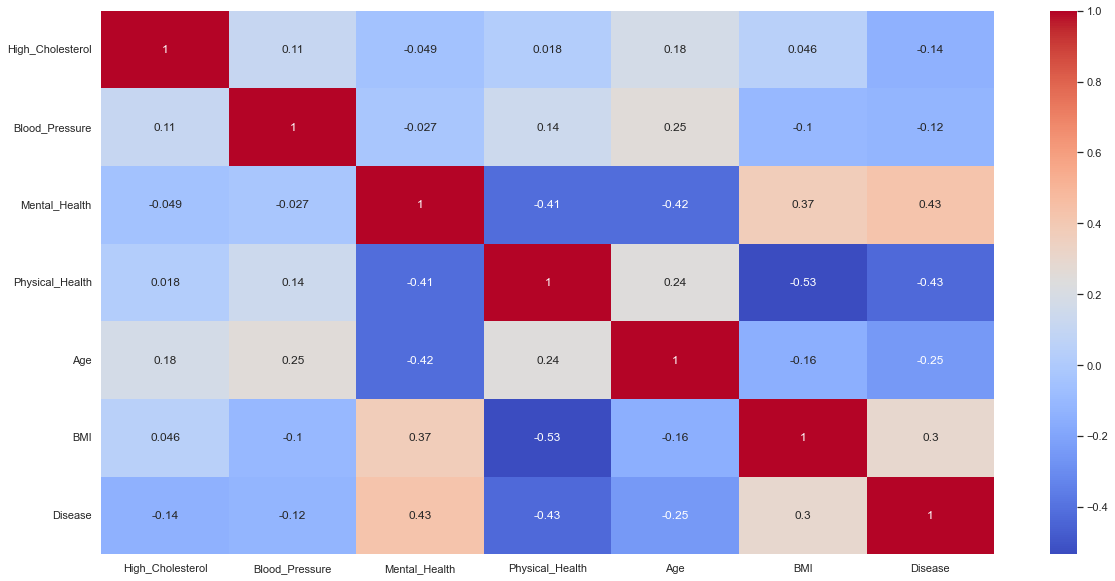

In [52]:
# Plot spearman correlation
plt.figure(figsize=(20,10))
sns.heatmap(all_train_num.corr(method='spearman'), annot=True, cmap='coolwarm')

In [53]:
# list of features with high correlation with target variable, threshold = 0.7, except target variable
threshold = 0.7
selected_feature_spearman = all_train_num.corr(method='spearman')['Disease'].abs().sort_values(ascending=False)\
            [all_train_num.corr(method='spearman')['Disease'].abs().sort_values(ascending=False) > threshold]
selected_feature_spearman = list(selected_feature_spearman.index)
selected_feature_spearman.remove('Disease')
selected_feature_spearman

[]

### RFE

In [54]:
# Create a logistic regression model
model = LogisticRegression()

#no of features
nof_list=list(range(1,11))
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in nof_list:
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = n)
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.759657


In [55]:
# Create the RFE model and select 3 attributes
rfe = RFE(estimator = model, n_features_to_select = nof)
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

selected_features_rfe = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
# Create a list of the selected features
selected_features_rfe = list(selected_features_rfe[selected_features_rfe==True].index)
selected_features_rfe

['High_Cholesterol', 'Mental_Health', 'Physical_Health']

### Lasso Regression

In [56]:
# Plotting function for feature importance
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

Lasso picked 6 variables and eliminated the other 0 variables


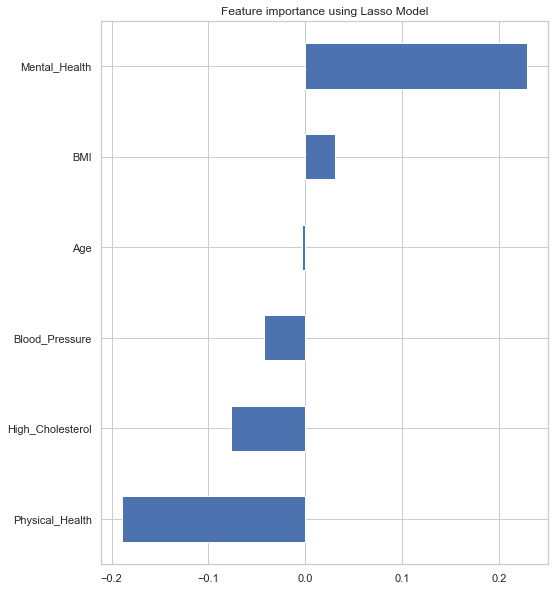

In [57]:
# Create a Lasso model
reg = LassoCV()
reg.fit(X_train_num_scaled, y_train)
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

coef.sort_values()

plot_importance(coef,'Lasso')

In [58]:
# with lasso coefficients, select features greater than threshold
threshold = 0.1
selected_features_greater = pd.Series(coef > threshold, index = X_train_num_scaled.columns)
selected_features_less = pd.Series(coef < -threshold, index = X_train_num_scaled.columns)
# combine the two series
selected_features = selected_features_greater | selected_features_less
# Create a list only with the selected features
selected_features_lasso = list(selected_features[selected_features == True].index)
selected_features_lasso

['Mental_Health', 'Physical_Health']

### Sequential Forward Selection (SFS)

In [59]:
# Get metrics features
metric_features = X_train_num_scaled.columns.to_list()
# Define data and target
data = X_train_num_scaled[metric_features]
target = y_train
# Secuential Feature Selection Algorithm
model = LogisticRegression()
# Stop when all features have been selected
forward = SFS(model, k_features=len(metric_features), forward=True, scoring="accuracy", cv = None)
forward.fit(data, target)
# Checking the features added at each step
forward_table = pd.DataFrame.from_dict(forward.get_metric_dict()).T.drop(columns=['cv_scores', 'ci_bound', 'std_dev', 'std_err'])
forward_table

,feature_idx,avg_score,feature_names
1,"(2,)",0.679035,"(Mental_Health,)"
2,"(2, 3)",0.716141,"(Mental_Health, Physical_Health)"
3,"(0, 2, 3)",0.719852,"(High_Cholesterol, Mental_Health, Physical_Hea..."
4,"(0, 1, 2, 3)",0.729128,"(High_Cholesterol, Blood_Pressure, Mental_Heal..."
5,"(0, 1, 2, 3, 4)",0.729128,"(High_Cholesterol, Blood_Pressure, Mental_Heal..."
6,"(0, 1, 2, 3, 4, 5)",0.725417,"(High_Cholesterol, Blood_Pressure, Mental_Heal..."


In [60]:
# Iteration with the highest score
forward_table_max = forward_table['avg_score'].max()
forward_table_max

0.7291280148423006

In [61]:
# Convert to list without tuple
selected_features_sfs = forward_table[forward_table['avg_score']==forward_table_max]['feature_names'].values
selected_features_sfs = list(selected_features_sfs[0])
selected_features_sfs

['High_Cholesterol', 'Blood_Pressure', 'Mental_Health', 'Physical_Health']

### Sequential Backward Selection (SBS)

In [62]:
# Stop when only one feature remains
model = LogisticRegression()
backward = SFS(model, k_features=1, forward=False, scoring="accuracy", cv = None)
backward.fit(data, target)

# Checking the features removed at each step
backward_table = pd.DataFrame.from_dict(backward.get_metric_dict()).T.drop(columns=['cv_scores', 'ci_bound', 'std_dev', 'std_err'])
backward_table

,feature_idx,avg_score,feature_names
6,"(0, 1, 2, 3, 4, 5)",0.725417,"(High_Cholesterol, Blood_Pressure, Mental_Heal..."
5,"(0, 1, 2, 3, 4)",0.729128,"(High_Cholesterol, Blood_Pressure, Mental_Heal..."
4,"(0, 1, 2, 3)",0.729128,"(High_Cholesterol, Blood_Pressure, Mental_Heal..."
3,"(0, 2, 3)",0.719852,"(High_Cholesterol, Mental_Health, Physical_Hea..."
2,"(2, 3)",0.716141,"(Mental_Health, Physical_Health)"
1,"(2,)",0.679035,"(Mental_Health,)"


In [63]:
# Iteration with the highest score
backward_table_max = backward_table['avg_score'].max()
backward_table_max

0.7291280148423006

In [64]:
# Convert to list without tuple
selected_features_sbs = backward_table[backward_table['avg_score']==backward_table_max]['feature_names'].values
selected_features_sbs = list(selected_features_sbs[0])
selected_features_sbs

['High_Cholesterol',
 'Blood_Pressure',
 'Mental_Health',
 'Physical_Health',
 'Age']

### Selected Features

In [65]:
# Create a list of the selected features
selected_features_list = [selected_features_var, selected_feature_spearman, selected_features_rfe, selected_features_lasso\
                        , selected_features_sfs, selected_features_sbs]
# Create a dataframe and set numeric features as index
selected_features_df = pd.DataFrame(index = X_train_num_scaled.columns)
# create a column for each selected features
for i in range(len(selected_features_list)):
    selected_features_df[i] = selected_features_df.index.isin(selected_features_list[i])
# Replace True with Keep and False with Discard
selected_features_df = selected_features_df.replace({True:'Keep', False:'Discard'})
# Replace column name with the selected features name
selected_features_df.columns = ['Var','Spearman', 'RFE', 'Lasso', 'SFS', 'SBS']
# Create a list of the selected features

# For each row in selected_features_df, set the mode of the row as a new column called 'Selected'
selected_features_df['Selected'] = selected_features_df.mode(axis=1)[0]
selected_features_num = selected_features_df[selected_features_df['Selected']=='Keep'].index.to_list()
selected_features_df

,Var,Spearman,RFE,Lasso,SFS,SBS,Selected
High_Cholesterol,Keep,Discard,Keep,Discard,Keep,Keep,Keep
Blood_Pressure,Keep,Discard,Discard,Discard,Keep,Keep,Discard
Mental_Health,Keep,Discard,Keep,Keep,Keep,Keep,Keep
Physical_Health,Keep,Discard,Keep,Keep,Keep,Keep,Keep
Age,Keep,Discard,Discard,Discard,Discard,Keep,Discard
BMI,Keep,Discard,Discard,Discard,Discard,Discard,Discard


## Categorical Variables

### Chi-square

In [66]:
selected_features_chi2 = []

def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        # store the feature name in the list
        selected_features_chi2.append(var)
    return selected_features_chi2

In [67]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)
# print the list of selected features
selected_features_chi2

['Drinking_Habit', 'Exercise', 'Fruit_Habit', 'Checkup', 'Diabetes']

### Dependent Variable Visualization

In [68]:
# first join all the training data
all_train = X_train.join(y_train)

def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")
    plt.xticks(rotation=90)

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation=90)


    plt.show()

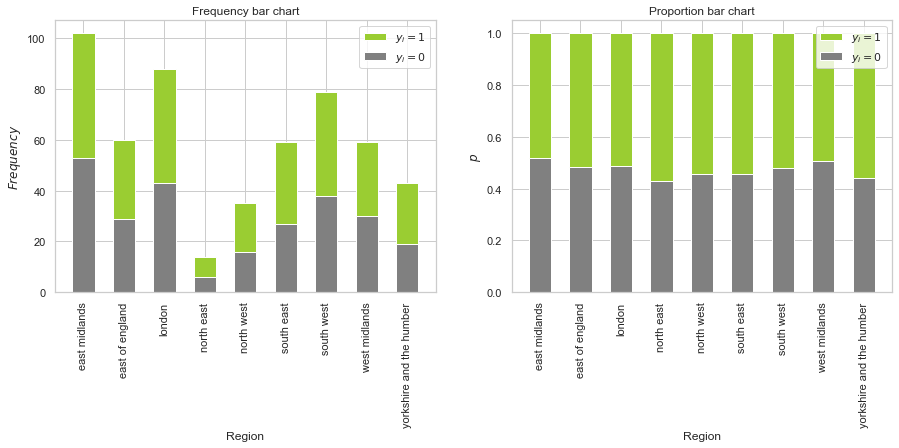

In [69]:
bar_charts_categorical(all_train, "Region", "Disease")

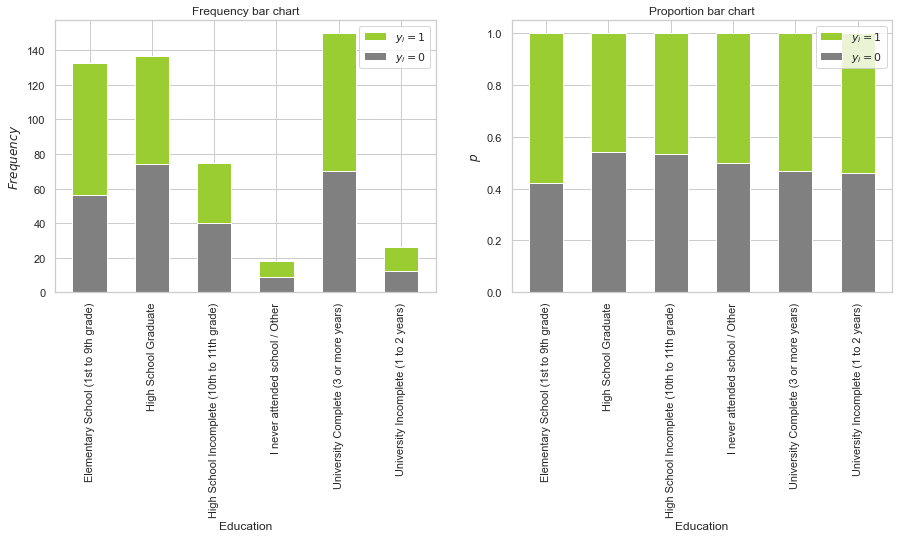

In [70]:
bar_charts_categorical(all_train, "Education", "Disease")

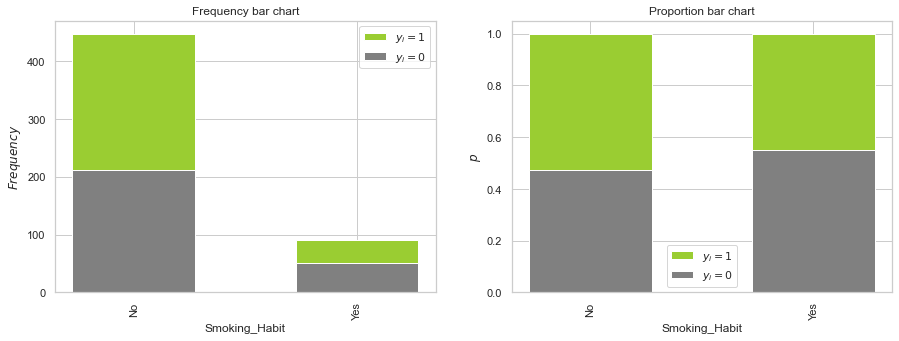

In [71]:
bar_charts_categorical(all_train, "Smoking_Habit", "Disease")

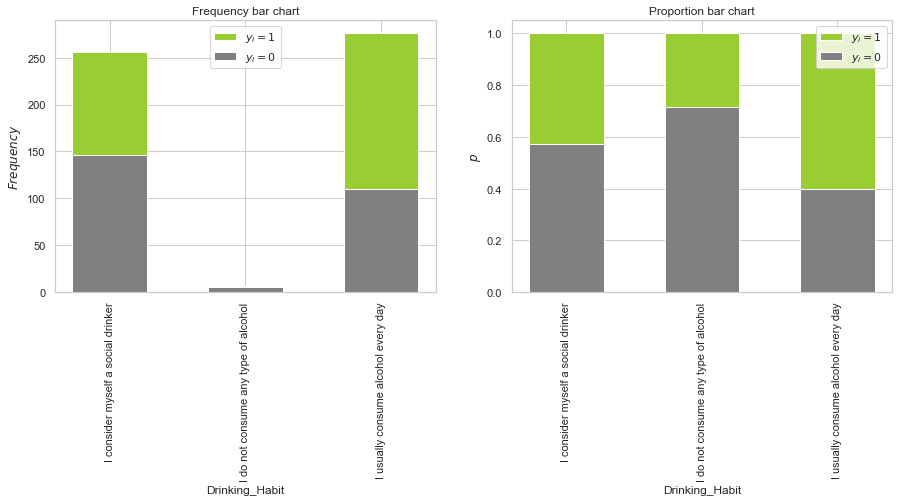

In [72]:
bar_charts_categorical(all_train, "Drinking_Habit", "Disease")

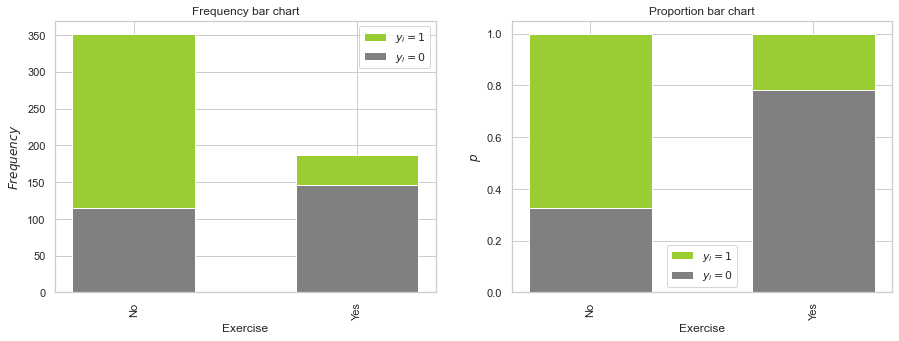

In [73]:
bar_charts_categorical(all_train, "Exercise", "Disease")

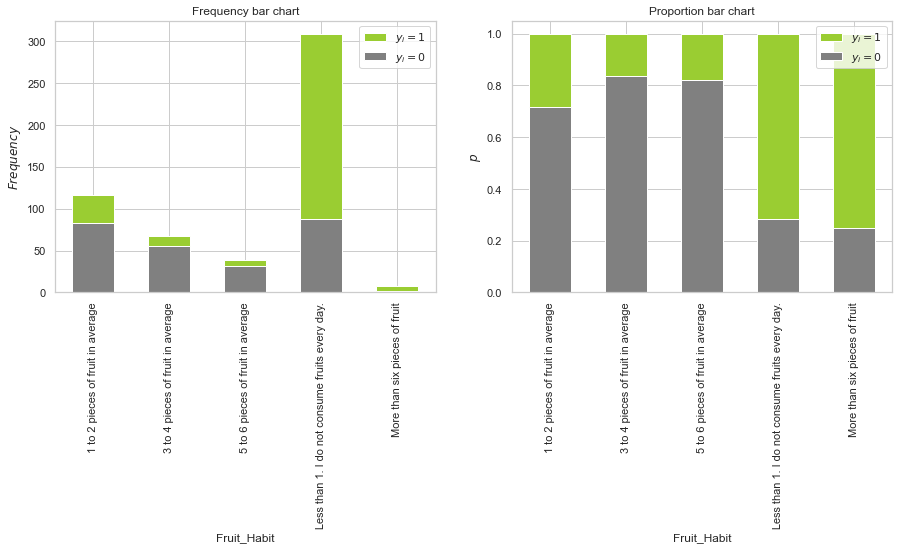

In [74]:
bar_charts_categorical(all_train, "Fruit_Habit", "Disease")

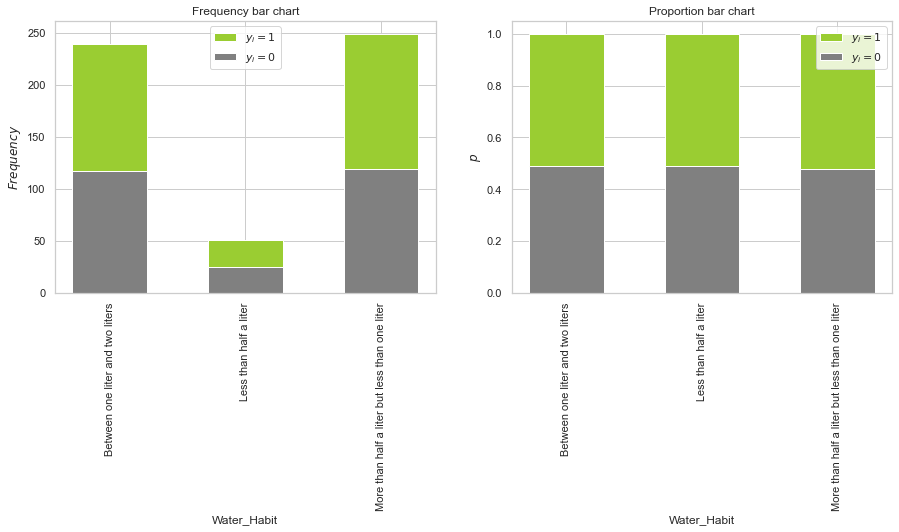

In [75]:
bar_charts_categorical(all_train, "Water_Habit", "Disease")

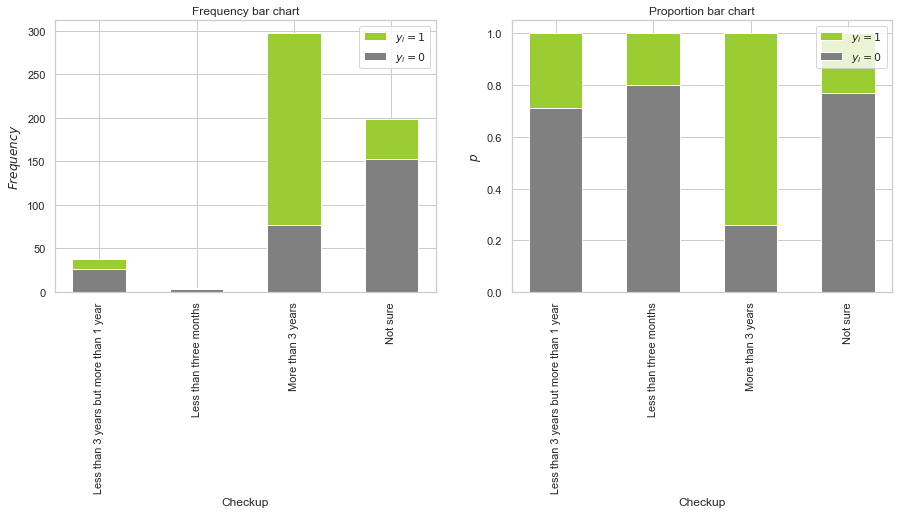

In [76]:
bar_charts_categorical(all_train, "Checkup", "Disease")

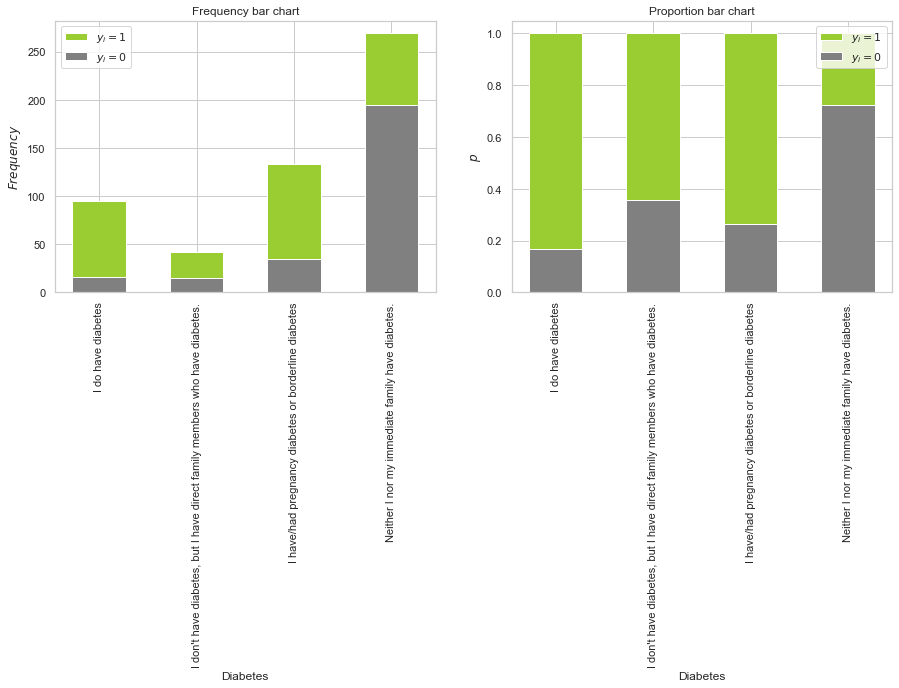

In [77]:
bar_charts_categorical(all_train, "Diabetes", "Disease")

### Selected Features

In [78]:
# Create a list of the selected features
selected_features_list = [selected_features_chi2]
# Create a dataframe and set numeric features as index
selected_features_df = pd.DataFrame(index = X_train_cat.columns)
# create a column for each selected features
for i in range(len(selected_features_list)):
    selected_features_df[i] = selected_features_df.index.isin(selected_features_list[i])
# Replace True with Keep and False with Discard
selected_features_df = selected_features_df.replace({True:'Keep', False:'Discard'})
# Replace column name with the selected features name
selected_features_df.columns = ['Chi2']

# For each row in selected_features_df, set the mode of the row as a new column called 'Selected'
selected_features_df['Selected'] = selected_features_df.mode(axis=1)[0]
# Create a list of the selected features
selected_features_cat = selected_features_df[selected_features_df['Selected']=='Keep'].index.to_list()
selected_features_df

,Chi2,Selected
Name,Discard,Discard
Region,Discard,Discard
Education,Discard,Discard
Smoking_Habit,Discard,Discard
Drinking_Habit,Keep,Keep
Exercise,Keep,Keep
Fruit_Habit,Keep,Keep
Water_Habit,Discard,Discard
Checkup,Keep,Keep
Diabetes,Keep,Keep


### Encoding Categorical Features

In [79]:
# Keep only numerical_selected from X_train_num_scaled, X_val_num_scaled and test_data_num_scaled
X_train_num_scaled = X_train_num_scaled[selected_features_num]
X_val_num_scaled = X_val_num_scaled[selected_features_num]
test_data_num_scaled = test_data_num_scaled[selected_features_num]

In [80]:
# Keep only categorical_selected from X_train_cat, X_val_cat and test_data_cat
X_train_cat = X_train_cat[selected_features_cat]
X_val_cat = X_val_cat[selected_features_cat]
test_data_cat = test_data_cat[selected_features_cat]

In [81]:
# one hot encoding using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_cat)
X_train_cat_encoded = encoder.transform(X_train_cat)
X_val_cat_encoded = encoder.transform(X_val_cat)
test_data_cat_encoded = encoder.transform(test_data_cat)

# Convert to dataframe
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names(), index=X_train_cat.index)
X_val_cat_encoded = pd.DataFrame(X_val_cat_encoded.toarray(), columns=encoder.get_feature_names(), index=X_val_cat.index)
test_data_cat_encoded = pd.DataFrame(test_data_cat_encoded.toarray(), columns=encoder.get_feature_names(),index=test_data_cat.index)

In [82]:
# Concatenate the numerical and categorical features
X_train = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_val = pd.concat([X_val_num_scaled, X_val_cat_encoded], axis = 1)
test_data = pd.concat([test_data_num_scaled, test_data_cat_encoded], axis = 1)

# Modeling

## Model ranking

In [83]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train, digits=4))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val, digits=4))
    print(confusion_matrix(y_val, pred_val))

In [84]:
def model_training(model):
    # Fit the model
    model.fit(X_train, y_train)
    # Predict the labels of the training set
    labels_train = model.predict(X_train)
    labels_val = model.predict(X_val)
    # Print the metrics
    return metrics(y_train, labels_train, y_val, labels_val)

## Decision Tree Classifier

In [85]:
# Create a Decision tree classifier model
dtc = DecisionTreeClassifier(random_state=15)
model_training(dtc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## Random Forest Classifier

In [86]:
# Create a Random Forest classifier model
rf = RandomForestClassifier(random_state = 15)
model_training(rf)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## Bagging Classifier

In [87]:
# Create a bagging classifier model
bc = BaggingClassifier(random_state=15)
model_training(bc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9962    1.0000    0.9981       261
           1     1.0000    0.9964    0.9982       278

    accuracy                         0.9981       539
   macro avg     0.9981    0.9982    0.9981       539
weighted avg     0.9982    0.9981    0.9981       539

[[261   0]
 [  1 277]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## Extra Trees Classifier

In [88]:
# Create an extra trees classifier model
etc = ExtraTreesClassifier(random_state = 15)
model_training(etc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## Histogram Gradient Boosting Classifier

In [89]:
# Create Histogram Gradient Boosting Classifier model
hgbc = HistGradientBoostingClassifier(random_state = 15)
model_training(hgbc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## Logistic Regression

In [90]:
# Create a logistic regression model
lreg = LogisticRegression(random_state = 15)
model_training(lreg)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8724    0.8123    0.8413       261
           1     0.8345    0.8885    0.8606       278

    accuracy                         0.8516       539
   macro avg     0.8534    0.8504    0.8509       539
weighted avg     0.8528    0.8516    0.8513       539

[[212  49]
 [ 31 247]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## Gradient Boosting Classifier

In [91]:
# Create a gradient boosting model
gbc = GradientBoostingClassifier(random_state = 15)
model_training(gbc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9883    0.9693    0.9787       261
           1     0.9717    0.9892    0.9804       278

    accuracy                         0.9796       539
   macro avg     0.9800    0.9793    0.9796       539
weighted avg     0.9797    0.9796    0.9796       539

[[253   8]
 [  3 275]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## KNeigbors Classifier

In [92]:
# Create a KNN model
knc = KNeighborsClassifier()
model_training(knc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9209    0.8927    0.9066       261
           1     0.9021    0.9281    0.9149       278

    accuracy                         0.9109       539
   macro avg     0.9115    0.9104    0.9108       539
weighted avg     0.9112    0.9109    0.9109       539

[[233  28]
 [ 20 258]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## Support Vector Machine Classifier

In [93]:
# Create a SVM model
svc = SVC(random_state = 15)
model_training(svc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9514    0.9004    0.9252       261
           1     0.9110    0.9568    0.9333       278

    accuracy                         0.9295       539
   macro avg     0.9312    0.9286    0.9293       539
weighted avg     0.9305    0.9295    0.9294       539

[[235  26]
 [ 12 266]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## Gaussian Naive Bayes

In [94]:
# Create a Naive Bayes model
gnb = GaussianNB()
model_training(gnb)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8354    0.7778    0.8056       261
           1     0.8041    0.8561    0.8293       278

    accuracy                         0.8182       539
   macro avg     0.8197    0.8169    0.8174       539
weighted avg     0.8192    0.8182    0.8178       539

[[203  58]
 [ 40 238]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## Multi-layer Perceptron classifier

In [95]:
# Create a Neural Network model
mlpc = MLPClassifier(random_state = 15)
model_training(mlpc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9375    0.9195    0.9284       261
           1     0.9258    0.9424    0.9340       278

    accuracy                         0.9314       539
   macro avg     0.9316    0.9310    0.9312       539
weighted avg     0.9315    0.9314    0.9313       539

[[240  21]
 [ 16 262]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## AdaBoost Classifier

In [96]:
# Create an AdaBoost Classifier model
abc = AdaBoostClassifier(random_state = 15)
model_training(abc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9180    0.9004    0.9091       261
           1     0.9081    0.9245    0.9162       278

    accuracy                         0.9128       539
   macro avg     0.9130    0.9124    0.9127       539
weighted avg     0.9129    0.9128    0.9128       539

[[235  26]
 [ 21 257]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## Stochastic Gradient Descent Classifier

In [97]:
# Create a SGD Classifier model
sgdc = SGDClassifier(random_state = 15)
model_training(sgdc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8696    0.7663    0.8147       261
           1     0.8026    0.8921    0.8450       278

    accuracy                         0.8312       539
   macro avg     0.8361    0.8292    0.8298       539
weighted avg     0.8350    0.8312    0.8303       539

[[200  61]
 [ 30 248]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## Voting Classifier

In [98]:
# Create a Voting Classifier model
estimators = [('lr', LogisticRegression()), ('rf', RandomForestClassifier()),\
            ('gb', GradientBoostingClassifier()), ('knn', KNeighborsClassifier()),\
            ('svm', SVC()), ('nb', GaussianNB()), ('nn', MLPClassifier()),\
            ('dtc', DecisionTreeClassifier()), ('etc', ExtraTreesClassifier()),\
            ('hgbc', HistGradientBoostingClassifier()), ('abc', AdaBoostClassifier()),\
            ('sgdc', SGDClassifier()), ('bc', BaggingClassifier())]
vc = VotingClassifier(estimators,voting='hard')
model_training(vc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9685    0.9425    0.9553       261
           1     0.9474    0.9712    0.9591       278

    accuracy                         0.9573       539
   macro avg     0.9579    0.9569    0.9572       539
weighted avg     0.9576    0.9573    0.9573       539

[[246  15]
 [  8 270]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## Stacking Classifier

In [99]:
# Create a Stacking Classifier model
sc = StackingClassifier(estimators)
model_training(sc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

## Models performance summary

In [100]:
def best_model(models, model_names):
    # Create a dataframe with the results
    results = pd.DataFrame(columns = ['Model', 'F1 Score', 'Precision', 'Recall', 'Accuracy'])

    # Iterate over the models and store the results in the dataframe
    for i in range(len(models)):
        model = models[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        accuracy = accuracy_score(y_val, y_pred)
        results.loc[i] = [model_names[i], f1, precision, recall, accuracy]

    # Sort the dataframe by the F1 score
    results.sort_values(by = 'F1 Score', ascending = False, inplace = True)
    # Set column 'Model' as the index
    results.set_index('Model', inplace = True)

    # Print the results
    return results

In [101]:
# Determine the best model
models = [dtc, rf, sc, bc, etc, hgbc, lreg, gbc, knc, svc, gnb, mlpc, vc, abc, sgdc]
model_names = ['Decision Tree', 'Random Forest', 'Stacking Classifier', 'Bagging Classifier',\
                'Extra Trees Classifier', 'Histogram Gradient Boosting Classifier', 'Logistic Regression',\
                'Gradient Boosting Classifier', 'KNN', 'SVM', 'Naive Bayes', 'Multi-layer Perceptron classifier',\
                'Voting Classifier', 'AdaBoost Classifier', 'SGD Classifier']
best_model_df = best_model(models, model_names)
best_model_df

,F1 Score,Precision,Recall,Accuracy
Model,,,,
Stacking Classifier,1.000000,1.000000,1.000000,1.000000
Random Forest,0.995816,0.995746,0.995708,0.995708
Extra Trees Classifier,0.995816,0.995746,0.995708,0.995708
Bagging Classifier,0.991597,0.991566,0.991416,0.991416
Histogram Gradient Boosting Classifier,0.991597,0.991566,0.991416,0.991416
Decision Tree,0.983051,0.983420,0.982833,0.982833
Gradient Boosting Classifier,0.953975,0.952835,0.952790,0.952790
Voting Classifier,0.946502,0.944458,0.944206,0.944206
SVM,0.893443,0.888756,0.888412,0.888412


## Hyper-parameters settings

### Ramdomized and Grid Search Functions

In [102]:
def tuning_grid_search(model, parameter_grid, model_name):
    # Set the conditions

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    gridsearch = GridSearchCV(estimator=model,
                        param_grid=parameter_grid,
                        cv=cv,
                        scoring=['r2','neg_mean_squared_error'],
                        refit='r2',
                        verbose=2,
                        n_jobs=-1)

    # Perform the hyperparameter tuning
    gridsearch.fit(X_train, y_train)
    # find the best hyperparameters
    best_parameters = gridsearch.best_params_
    # storing the hyperparameters in a dataframe
    best_param_df = pd.DataFrame.from_dict(best_parameters, orient='index', columns=['Assigned Value']).sort_index()
    print(best_param_df.to_markdown())
    return gridsearch.best_estimator_

In [103]:
def tuning_random_search(model, parameter_grid, model_name):
    # Set the conditions

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    randsearch = RandomizedSearchCV(estimator=model,
                        param_distributions=parameter_grid,
                        n_iter=500,
                        cv=cv,
                        scoring=['r2','neg_mean_squared_error'],
                        refit='r2',
                        verbose= 4,
                        n_jobs=-1)

    # Perform the hyperparameter tuning
    randsearch.fit(X_train, y_train)
    # find the best hyperparameters
    best_parameters = randsearch.best_params_
    # storing the hyperparameters in a dataframe
    best_param_df = pd.DataFrame.from_dict(best_parameters, orient='index', columns=['Assigned Value']).sort_index()
    print(best_param_df.to_markdown())
    return randsearch.best_estimator_

### Decision Tree Classifier

In [104]:
# Create a grid for decision tree classifier
param_grid_dtc = {'criterion': ['gini', 'entropy'],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth': range(1,1000,10),\
                'min_samples_split': range(1,100,2),\
                'min_samples_leaf': range(1,100,2),
                'random_state': [15]}

In [105]:
# Find best parameters using Randomized search
print('Best parameters for Decision Tree Classifier using Randomized search')
model_grid_search_dtc_rs = tuning_random_search(DecisionTreeClassifier(), param_grid_dtc, 'Decision Tree Classifier')

Best parameters for Decision Tree Classifier using Randomized search
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
|                   | Assigned Value   |
|:------------------|:-----------------|
| criterion         | gini             |
| max_depth         | 961              |
| max_features      | log2             |
| min_samples_leaf  | 5                |
| min_samples_split | 35               |
| random_state      | 15               |


In [106]:
# Run model with best parameters using Randomized search
model_grid_search_dtc_rs.fit(X_train, y_train)
model_training(model_grid_search_dtc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.7896    0.9349    0.8561       261
           1     0.9261    0.7662    0.8386       278

    accuracy                         0.8479       539
   macro avg     0.8579    0.8505    0.8474       539
weighted avg     0.8600    0.8479    0.8471       539

[[244  17]
 [ 65 213]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [107]:
# Create a grid using the best parameters found in the previous step
param_grid_dtc_rs = {'criterion': ['gini', 'entropy'],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth': [170,181,190],
                'min_samples_split': [3,4,5,6,7],
                'min_samples_leaf': [1,2,3,4,5],
                'random_state': [15]}

In [108]:
# Find best parameters using Grid search
print('Best parameters for Decision Tre Classifier using Grid search')
model_grid_search_dtc_gs = tuning_grid_search(DecisionTreeClassifier(), param_grid_dtc_rs, 'Decision Tree Classifier')

Best parameters for Decision Tre Classifier using Grid search
Fitting 5 folds for each of 450 candidates, totalling 2250 fits
|                   | Assigned Value   |
|:------------------|:-----------------|
| criterion         | entropy          |
| max_depth         | 170              |
| max_features      | auto             |
| min_samples_leaf  | 1                |
| min_samples_split | 3                |
| random_state      | 15               |


In [109]:
# Run model with best parameters
model_grid_search_dtc_gs.fit(X_train, y_train)
model_training(model_grid_search_dtc_gs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9962    1.0000    0.9981       261
           1     1.0000    0.9964    0.9982       278

    accuracy                         0.9981       539
   macro avg     0.9981    0.9982    0.9981       539
weighted avg     0.9982    0.9981    0.9981       539

[[261   0]
 [  1 277]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### Random Forest

In [110]:
# Create a grid for random forest classifier
param_grid_rf = {'bootstrap': [True, False],
                'max_features': ['auto', 'sqrt', 'log2'],
                'n_estimators': range(1,1000,100),
                'max_depth': range(1,100,10),
                'min_samples_split': range(1,20,2),
                'min_samples_leaf': range(1,20,2),
                'random_state': [15]}

In [111]:
# Find best parameters using Randomized search
print('Best parameters for Random Forest Classifier using Randomized search')
model_grid_search_rf_rs = tuning_random_search(RandomForestClassifier(), param_grid_rf, 'Random forest Classifier')

Best parameters for Random Forest Classifier using Randomized search
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
|                   | Assigned Value   |
|:------------------|:-----------------|
| bootstrap         | True             |
| max_depth         | 91               |
| max_features      | sqrt             |
| min_samples_leaf  | 1                |
| min_samples_split | 3                |
| n_estimators      | 301              |
| random_state      | 15               |


In [112]:
# Run model with best parameters using Randomized search
model_grid_search_rf_rs.fit(X_train, y_train)
model_training(model_grid_search_rf_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [113]:
# Using the best parameters found in the previous step, create a grid for Grid search
param_grid_rf_rs = {'bootstrap': [True, False],
                'max_features': ['auto', 'sqrt', 'log2'],
                'n_estimators': [180,190,201],
                'max_depth': [10,11,12],
                'min_samples_split': [2,3,4,5],
                'min_samples_leaf': [1,2,3],
                'random_state': [15]}

In [114]:
# Find best parameters using Grid search
print('Best parameters for Random Forest Classifier using Grid search')
model_grid_search_rf_gs = tuning_grid_search(RandomForestClassifier(), param_grid_rf_rs, 'Random forest Classifier')

Best parameters for Random Forest Classifier using Grid search
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
|                   | Assigned Value   |
|:------------------|:-----------------|
| bootstrap         | True             |
| max_depth         | 12               |
| max_features      | auto             |
| min_samples_leaf  | 1                |
| min_samples_split | 2                |
| n_estimators      | 190              |
| random_state      | 15               |


In [115]:
# Run model with best parameters
model_grid_search_rf_gs.fit(X_train, y_train)
model_training(model_grid_search_rf_gs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### Bagging Classifier

In [116]:
# Create a grid for Bagging classifier
param_grid_bc = {'n_estimators': range(1,1000,100),
                'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                'bootstrap': [True, False],
                'bootstrap_features': [True, False],
                'random_state': [15]}

In [117]:
# Find best parameters using Randomized search
print('Best parameters for Bagging Classifier using Randomized search')
model_grid_search_bc_rs = tuning_random_search(BaggingClassifier(), param_grid_bc, 'Bagging Classifier')

Best parameters for Bagging Classifier using Randomized search
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
|                    |   Assigned Value |
|:-------------------|-----------------:|
| bootstrap          |              1   |
| bootstrap_features |              1   |
| max_features       |              0.7 |
| max_samples        |              1   |
| n_estimators       |            101   |
| random_state       |             15   |


In [118]:
# Run model with best parameters using Randomized search
model_grid_search_bc_rs.fit(X_train, y_train)
model_training(model_grid_search_bc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [119]:
# Using the best parameters found in the previous step, create a grid for Grid search
param_grid_bc_rs = {'n_estimators': [50,101,200,601],
                'max_samples': [0.8,0.9,1.0],
                'max_features': [0.6, 0.7, 0.8],
                'bootstrap': [True, False],
                'bootstrap_features': [True, False],
                'random_state': [15]}

In [120]:
# Find best parameters using Grid search
print('Best parameters for Bagging Classifier using Grid search')
model_grid_search_bc_gs = tuning_grid_search(BaggingClassifier(), param_grid_bc_rs, 'Bagging Classifier')

Best parameters for Bagging Classifier using Grid search
Fitting 5 folds for each of 144 candidates, totalling 720 fits
|                    |   Assigned Value |
|:-------------------|-----------------:|
| bootstrap          |              1   |
| bootstrap_features |              1   |
| max_features       |              0.7 |
| max_samples        |              1   |
| n_estimators       |            101   |
| random_state       |             15   |


In [121]:
# Run model with best parameters
model_grid_search_bc_gs.fit(X_train, y_train)
model_training(model_grid_search_bc_gs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### Extra Trees Classifier

In [122]:
# create a grid for extra forest classifier                
param_grid_etc = {'n_estimators': range(0,500,40),
                'max_depth': range(1,100,5),
                'min_samples_split': range(1,100,5),
                'min_samples_leaf': range(1,100,5),
                'max_features': ['auto', 'sqrt', 'log2'],
                'criterion': ['gini', 'entropy'],
                'bootstrap': [True, False],
                'random_state': [15]}

In [123]:
# Find best parameters using Randomized search
print('Best parameters for Extra Trees Classifier using Randomized search')
model_grid_search_etc_rs = tuning_random_search(ExtraTreesClassifier(), param_grid_etc, 'Extra Trees Classifier')

Best parameters for Extra Trees Classifier using Randomized search
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
|                   | Assigned Value   |
|:------------------|:-----------------|
| bootstrap         | False            |
| criterion         | entropy          |
| max_depth         | 66               |
| max_features      | sqrt             |
| min_samples_leaf  | 1                |
| min_samples_split | 6                |
| n_estimators      | 160              |
| random_state      | 15               |


In [124]:
# Run model with best parameters
model_grid_search_etc_rs.fit(X_train, y_train)
model_training(model_grid_search_etc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9962    0.9962    0.9962       261
           1     0.9964    0.9964    0.9964       278

    accuracy                         0.9963       539
   macro avg     0.9963    0.9963    0.9963       539
weighted avg     0.9963    0.9963    0.9963       539

[[260   1]
 [  1 277]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [125]:
# Using the best parameters found in the previous step, create a grid for Grid search               
param_grid_etc_rs = {'n_estimators': [200,300,360,400],
                'max_depth': [30,40,50],
                'min_samples_split': [5,6,10],
                'min_samples_leaf': [1,2,3],
                'max_features': ['auto', 'sqrt', 'log2'],
                'criterion': ['gini', 'entropy'],
                'bootstrap': [True, False],
                'random_state': [15]}

In [126]:
# Find best parameters using Grid search
print('Best parameters for Extra Trees Classifier using Grid search')
model_grid_search_etc_gs = tuning_grid_search(ExtraTreesClassifier(), param_grid_etc_rs, 'Extra Trees Classifier')

Best parameters for Extra Trees Classifier using Grid search
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
|                   | Assigned Value   |
|:------------------|:-----------------|
| bootstrap         | False            |
| criterion         | entropy          |
| max_depth         | 30               |
| max_features      | auto             |
| min_samples_leaf  | 1                |
| min_samples_split | 5                |
| n_estimators      | 300              |
| random_state      | 15               |


In [127]:
# Run model with best parameters
model_grid_search_etc_gs.fit(X_train, y_train)
model_training(model_grid_search_etc_gs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9962    1.0000    0.9981       261
           1     1.0000    0.9964    0.9982       278

    accuracy                         0.9981       539
   macro avg     0.9981    0.9982    0.9981       539
weighted avg     0.9982    0.9981    0.9981       539

[[261   0]
 [  1 277]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### Histogram Gradient Boosting Classifier

In [128]:
# Create a grid for Histogram Gradient Boosting classifier
param_grid_hgbc = {'loss':['log_loss', 'least_squares', 'least_absolute_deviation'],
                'max_iter': range(100,1000,100),
                'max_leaf_nodes': range(1,500,10),
                'min_samples_leaf': range(1,500,10),
                'max_depth': range(1,100,5),
                'random_state': [15],
                'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [129]:
# Find best parameters using Randomized search
print('Best parameters for Histogram Gradient Boosting Classifier using Randomized search')
model_grid_search_hgbc_rs = tuning_random_search(HistGradientBoostingClassifier(), param_grid_hgbc, 'Histogram Gradient Boosting Classifier')

Best parameters for Histogram Gradient Boosting Classifier using Randomized search
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
|                  | Assigned Value   |
|:-----------------|:-----------------|
| learning_rate    | 0.9              |
| loss             | log_loss         |
| max_depth        | 96               |
| max_iter         | 200              |
| max_leaf_nodes   | 371              |
| min_samples_leaf | 71               |
| random_state     | 15               |


In [130]:
# Run model with best parameters
model_grid_search_hgbc_rs.fit(X_train, y_train)
model_training(model_grid_search_hgbc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [131]:
# Using the best parameters found in the previous step, create a grid for Grid search
param_grid_hgbc_rs = {'loss':['log_loss', 'least_squares', 'least_absolute_deviation'],
                'max_iter': [550,600,650],
                'max_leaf_nodes': [86,91,95],
                'min_samples_leaf': [65,71,80],
                'max_depth': [20,26,30],
                'random_state': [15],
                'learning_rate': [0.8,0.9,1]}

In [132]:
# Find best parameters using Grid search
print('Best parameters for Histogram Gradient Boosting Classifier using Grid search')
model_grid_search_hgbc_gs = tuning_grid_search(HistGradientBoostingClassifier(), param_grid_hgbc_rs, 'Histogram Gradient Boosting Classifier')

Best parameters for Histogram Gradient Boosting Classifier using Grid search
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
|                  | Assigned Value   |
|:-----------------|:-----------------|
| learning_rate    | 0.9              |
| loss             | log_loss         |
| max_depth        | 20               |
| max_iter         | 600              |
| max_leaf_nodes   | 86               |
| min_samples_leaf | 71               |
| random_state     | 15               |


In [133]:
# Run model with best parameters
model_grid_search_hgbc_gs.fit(X_train, y_train)
model_training(model_grid_search_hgbc_gs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### Logistic Regression

In [134]:
# create a grid for Logistic Regression classifier                         
param_grid_lreg = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],\
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],\
                    'max_iter': range(1,1000,50),\
                    'multi_class': ['auto', 'ovr', 'multinomial'],\
                    'fit_intercept': [True, False],\
                    'dual': [True, False],\
                    'C': [0.25, 0.5, 0.75, 1.0],
                    'warm_start': [True, False],\
                    'intercept_scaling': range(0,100,10)}

In [135]:
# Find best parameters using Randomized search
print('Best parameters for Logistic Regression using Randomized search')
model_grid_search_lreg_rs = tuning_random_search(LogisticRegression(), param_grid_lreg, 'Logistic Regression')

Best parameters for Logistic Regression using Randomized search
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
|                   | Assigned Value   |
|:------------------|:-----------------|
| C                 | 0.75             |
| dual              | False            |
| fit_intercept     | False            |
| intercept_scaling | 80               |
| max_iter          | 1                |
| multi_class       | auto             |
| penalty           | none             |
| solver            | newton-cg        |
| warm_start        | False            |


In [136]:
# Run model with best parameters
model_grid_search_lreg_rs.fit(X_train, y_train)
model_training(model_grid_search_lreg_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9031    0.7854    0.8402       261
           1     0.8205    0.9209    0.8678       278

    accuracy                         0.8553       539
   macro avg     0.8618    0.8532    0.8540       539
weighted avg     0.8605    0.8553    0.8544       539

[[205  56]
 [ 22 256]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [137]:
# Using the best parameters found in the previous step, create a grid for Grid search
param_grid_lreg_rs = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],\
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],\
                    'max_iter': [1,2,3,4],\
                    'multi_class': ['auto', 'ovr', 'multinomial'],\
                    'fit_intercept': [True, False],\
                    'dual': [True, False],\
                    'C': [0,25,0.50,0.75,1],
                    'warm_start': [True, False],\
                    'intercept_scaling': [40,50,55]}

In [138]:
# Find best parameters using Grid search
print('Best parameters for Logistic Regressionr using Grid search')
model_grid_search_lreg_gs = tuning_grid_search(LogisticRegression(), param_grid_lreg_rs, 'Logistic Regressionr')

Best parameters for Logistic Regressionr using Grid search
Fitting 5 folds for each of 28800 candidates, totalling 144000 fits
|                   | Assigned Value   |
|:------------------|:-----------------|
| C                 | 0.75             |
| dual              | False            |
| fit_intercept     | False            |
| intercept_scaling | 40               |
| max_iter          | 4                |
| multi_class       | auto             |
| penalty           | l2               |
| solver            | sag              |
| warm_start        | False            |


In [139]:
# Run model with best parameters
model_grid_search_lreg_gs.fit(X_train, y_train)
model_training(model_grid_search_lreg_gs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8811    0.8238    0.8515       261
           1     0.8441    0.8957    0.8691       278

    accuracy                         0.8609       539
   macro avg     0.8626    0.8597    0.8603       539
weighted avg     0.8620    0.8609    0.8606       539

[[215  46]
 [ 29 249]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### Gradient Boosting Classifier

In [140]:
# create a grid for gradient boost classifier                
param_grid_gbc = {'n_estimators': range(1,1000,5),\
                'max_depth': range(1,100,5),\
                'min_samples_split': range(1,100,5),\
                'min_samples_leaf': range(1,100,5),\
                'max_features': ['auto', 'sqrt', 'log2'],
                'random_state': [15]}

In [141]:
# Find best parameters using Randomized search
print('Best parameters for Gradient Boosting Classifier using Randomized search')
model_grid_search_gbc_rs = tuning_random_search(GradientBoostingClassifier(), param_grid_gbc, 'Gradient Boosting Classifier')

Best parameters for Gradient Boosting Classifier using Randomized search
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
|                   | Assigned Value   |
|:------------------|:-----------------|
| max_depth         | 16               |
| max_features      | log2             |
| min_samples_leaf  | 1                |
| min_samples_split | 76               |
| n_estimators      | 456              |
| random_state      | 15               |


In [142]:
# Run model with best parameters
model_grid_search_gbc_rs.fit(X_train, y_train)
model_training(model_grid_search_gbc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [143]:
# Using the best parameters found in the previous step, create a grid for Grid search             
param_grid_gbc_rs = {'n_estimators': [520,530,536,540],\
                'max_depth': [80,86,90],\
                'min_samples_split': [60,61,65],\
                'min_samples_leaf': [5,6,7,8],\
                'max_features': ['auto', 'sqrt', 'log2'],
                'random_state': [15]}

In [144]:
# Find best parameters using Grid search
print('Best parameters for Gradient Boosting Classifier using Grid search')
model_grid_search_gbc_gs = tuning_grid_search(GradientBoostingClassifier(), param_grid_gbc_rs, 'Gradient Boosting Classifier')

Best parameters for Gradient Boosting Classifier using Grid search
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
|                   | Assigned Value   |
|:------------------|:-----------------|
| max_depth         | 80               |
| max_features      | sqrt             |
| min_samples_leaf  | 8                |
| min_samples_split | 61               |
| n_estimators      | 520              |
| random_state      | 15               |


In [145]:
# Run model with best parameters
model_grid_search_gbc_gs.fit(X_train, y_train)
model_training(model_grid_search_gbc_gs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### KNeigbors Classifier

In [146]:
# create a grid for KNN classifier
param_grid_knc = {'n_neighbors': range(1,100,5),\
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': range(1,1000,10),
                'p': [1, 2], 
                'metric': ['minkowski', 'euclidean', 'manhattan']}

In [147]:
# Find best parameters using Randomized search
print('Best parameters for KNeighbors Classifier using Randomized search')
model_grid_search_knc_rs = tuning_random_search(KNeighborsClassifier(), param_grid_knc, 'KNeighbors Classifier')

Best parameters for KNeighbors Classifier using Randomized search
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
|             | Assigned Value   |
|:------------|:-----------------|
| algorithm   | kd_tree          |
| leaf_size   | 561              |
| metric      | euclidean        |
| n_neighbors | 86               |
| p           | 1                |
| weights     | distance         |


In [148]:
# Run model with best parameters
model_grid_search_knc_rs.fit(X_train, y_train)
model_training(model_grid_search_knc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [149]:
# Using the best parameters found in the previous step, create a grid for Grid search
param_grid_knc_rs = {'n_neighbors': [75,81,90],\
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size':[250,271,300],
                'p': [1, 2], 
                'metric': ['minkowski', 'euclidean', 'manhattan']}

In [150]:
# Find best parameters using Grid search
print('Best parameters for KNeighbors Classifier using Grid search')
model_grid_search_knc_rs = tuning_grid_search(KNeighborsClassifier(), param_grid_knc_rs, 'KNeighbors Classifier')

Best parameters for KNeighbors Classifier using Grid search
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
|             | Assigned Value   |
|:------------|:-----------------|
| algorithm   | auto             |
| leaf_size   | 250              |
| metric      | minkowski        |
| n_neighbors | 75               |
| p           | 2                |
| weights     | distance         |


In [151]:
# Run model with best parameters
model_grid_search_knc_rs.fit(X_train, y_train)
model_training(model_grid_search_knc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### Support Vector Machine Classifier

In [152]:
# create a grid for Support Vector Machine classifier
param_grid_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                    'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                    'coef0': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    'tol': [0.001, 0.0001, 0.00001],
                    'cache_size': range(1,1000,10),
                    'max_iter': [-1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                    'random_state': [15],
                    'C': [0.1, 1, 10, 100, 1000]}

In [153]:
# Find best parameters using Randomized search
print('Best parameters for Support Vector Machine Classifier using Randomized search')
model_grid_search_svc_rs = tuning_random_search(SVC(), param_grid_svm, 'Support Vector Machine Classifier')

Best parameters for Support Vector Machine Classifier using Randomized search
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
|              | Assigned Value   |
|:-------------|:-----------------|
| C            | 1000             |
| cache_size   | 681              |
| coef0        | 0.3              |
| degree       | 6                |
| kernel       | rbf              |
| max_iter     | 300              |
| random_state | 15               |
| tol          | 1e-05            |


In [154]:
# Run model with best parameters
model_grid_search_svc_rs.fit(X_train, y_train)
model_training(model_grid_search_svc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    0.9923    0.9962       261
           1     0.9929    1.0000    0.9964       278

    accuracy                         0.9963       539
   macro avg     0.9964    0.9962    0.9963       539
weighted avg     0.9963    0.9963    0.9963       539

[[259   2]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [155]:
# Using the best parameters found in the previous step, create a grid for Grid search
param_grid_svm_rs = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                    'degree': [4,5,6],
                    'coef0': [0.7,0.8,0.9],
                    'tol': [0.001, 0.0001, 0.00001],
                    'cache_size': [70,81,90],
                    'max_iter': [500,600,700],
                    'random_state': [15],
                    'C': [100,150,200]}

In [156]:
# Find best parameters using Grid search
print('Best parameters for Support Vector Machine Classifier using Grid search')
model_grid_search_svc_gs = tuning_grid_search(SVC(), param_grid_svm_rs, 'Support Vector Machine Classifier')

Best parameters for Support Vector Machine Classifier using Grid search
Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
|              | Assigned Value   |
|:-------------|:-----------------|
| C            | 100              |
| cache_size   | 70               |
| coef0        | 0.7              |
| degree       | 4                |
| kernel       | poly             |
| max_iter     | 500              |
| random_state | 15               |
| tol          | 0.001            |


In [157]:
# Run model with best parameters
model_grid_search_svc_gs.fit(X_train, y_train)
model_training(model_grid_search_svc_gs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9962    1.0000    0.9981       261
           1     1.0000    0.9964    0.9982       278

    accuracy                         0.9981       539
   macro avg     0.9981    0.9982    0.9981       539
weighted avg     0.9982    0.9981    0.9981       539

[[261   0]
 [  1 277]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### Gaussian Naive Bayes

In [158]:
# create a grid for Naive Bayes classifier                        
param_grid_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [159]:
# Find best parameters using Randomized search
print('Best parameters for Gaussian Naive Bayes using Randomized search')
model_grid_search_gnb_rs = tuning_random_search(GaussianNB(), param_grid_gnb, 'Gaussian Naive Bayes')

Best parameters for Gaussian Naive Bayes using Randomized search
Fitting 5 folds for each of 100 candidates, totalling 500 fits
|               |   Assigned Value |
|:--------------|-----------------:|
| var_smoothing |          0.53367 |


In [160]:
# Run model with best parameters
model_grid_search_gnb_rs.fit(X_train, y_train)
model_training(model_grid_search_gnb_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9107    0.7816    0.8412       261
           1     0.8190    0.9281    0.8702       278

    accuracy                         0.8571       539
   macro avg     0.8649    0.8548    0.8557       539
weighted avg     0.8634    0.8571    0.8562       539

[[204  57]
 [ 20 258]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [161]:
# Using the best parameters found in the previous step, create a grid for Grid search                       
param_grid_gnb_rs = {'var_smoothing': [0.4,0.53367,0.6]}

In [162]:
# Find best parameters using Grid search
print('Best parameters for Gaussian Naive Bayes using Grid search')
model_grid_search_gnb_gs = tuning_grid_search(GaussianNB(), param_grid_gnb_rs, 'Gaussian Naive Bayes')

Best parameters for Gaussian Naive Bayes using Grid search
Fitting 5 folds for each of 3 candidates, totalling 15 fits
|               |   Assigned Value |
|:--------------|-----------------:|
| var_smoothing |          0.53367 |


In [163]:
# Run model with best parameters
model_grid_search_gnb_rs.fit(X_train, y_train)
model_training(model_grid_search_gnb_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9107    0.7816    0.8412       261
           1     0.8190    0.9281    0.8702       278

    accuracy                         0.8571       539
   macro avg     0.8649    0.8548    0.8557       539
weighted avg     0.8634    0.8571    0.8562       539

[[204  57]
 [ 20 258]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### Multi-layer Perceptron classifier

In [164]:
# create a grid for Multi-layer Perceptron classifier                    
param_grid_mlpc = {'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,)],
                    'activation': ['identity', 'logistic', 'tanh', 'relu'],
                    'solver': ['lbfgs', 'sgd', 'adam'],
                    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                    'learning_rate': ['constant','invscaling','adaptive'],
                    'max_iter': range(1,1000,10),
                    'random_state': [15]}

In [165]:
# Find best parameters using Randomized search
print('Best parameters for Multi-layer Perceptron classifier using Randomized search')
model_grid_search_mlpc_rs = tuning_random_search(MLPClassifier(), param_grid_mlpc, 'Multi-layer Perceptron classifier')

Best parameters for Multi-layer Perceptron classifier using Randomized search
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
|                    | Assigned Value   |
|:-------------------|:-----------------|
| activation         | tanh             |
| alpha              | 0.001            |
| hidden_layer_sizes | (20,)            |
| learning_rate      | adaptive         |
| max_iter           | 71               |
| random_state       | 15               |
| solver             | lbfgs            |


In [166]:
# Run model with best parameters
model_grid_search_mlpc_rs.fit(X_train, y_train)
model_training(model_grid_search_mlpc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9962    1.0000    0.9981       261
           1     1.0000    0.9964    0.9982       278

    accuracy                         0.9981       539
   macro avg     0.9981    0.9982    0.9981       539
weighted avg     0.9982    0.9981    0.9981       539

[[261   0]
 [  1 277]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [167]:
# Using the best parameters found in the previous step, create a grid for Grid search  
param_grid_mlpc_rs = {'hidden_layer_sizes': [(10,), (20,), (30,)],
                    'activation': ['identity', 'logistic', 'tanh', 'relu'],
                    'solver': ['lbfgs', 'sgd', 'adam'],
                    'alpha': [0.001, 0.01, 0.1],
                    'learning_rate': ['constant','invscaling','adaptive'],
                    'max_iter': [110,121,130],
                    'random_state': [15]}

In [168]:
# Find best parameters using Grid search
print('Best parameters for Multi-layer Perceptron classifier using Grid search')
model_grid_search_mlpc_gs = tuning_grid_search(MLPClassifier(), param_grid_mlpc_rs, 'Multi-layer Perceptron classifier')

Best parameters for Multi-layer Perceptron classifier using Grid search
Fitting 5 folds for each of 972 candidates, totalling 4860 fits
|                    | Assigned Value   |
|:-------------------|:-----------------|
| activation         | tanh             |
| alpha              | 0.001            |
| hidden_layer_sizes | (20,)            |
| learning_rate      | constant         |
| max_iter           | 110              |
| random_state       | 15               |
| solver             | lbfgs            |


In [169]:
# Run model with best parameters
model_grid_search_mlpc_rs.fit(X_train, y_train)
model_training(model_grid_search_mlpc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9962    1.0000    0.9981       261
           1     1.0000    0.9964    0.9982       278

    accuracy                         0.9981       539
   macro avg     0.9981    0.9982    0.9981       539
weighted avg     0.9982    0.9981    0.9981       539

[[261   0]
 [  1 277]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### AdaBoost Classifier

In [170]:
# create a grid for Ada Boost classifier                    
param_grid_abc = {'n_estimators': range(1,500,10),\
                'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                'algorithm': ['SAMME', 'SAMME.R'],
                'random_state': [15]}               

In [171]:
# Find best parameters using Randomized search
print('Best parameters for AdaBoost Classifier using Randomized search')
model_grid_search_abc_rs = tuning_random_search(AdaBoostClassifier(), param_grid_abc, 'AdaBoost Classifier')

Best parameters for AdaBoost Classifier using Randomized search
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
|               | Assigned Value   |
|:--------------|:-----------------|
| algorithm     | SAMME.R          |
| learning_rate | 1                |
| n_estimators  | 381              |
| random_state  | 15               |


In [172]:
# Run model with best parameters
model_grid_search_abc_rs.fit(X_train, y_train)
model_training(model_grid_search_abc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9504    0.9540    0.9522       261
           1     0.9567    0.9532    0.9550       278

    accuracy                         0.9536       539
   macro avg     0.9535    0.9536    0.9536       539
weighted avg     0.9536    0.9536    0.9536       539

[[249  12]
 [ 13 265]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [173]:
# Using the best parameters found in the previous step, create a grid for Grid search                   
param_grid_abc_rs = {'n_estimators': [370,381,390],\
                'learning_rate': [0.001, 0.01, 0.1, 1, 5],
                'algorithm': ['SAMME', 'SAMME.R'],
                'random_state': [15]}      

In [174]:
# Find best parameters using Grid search
print('Best parameters for AdaBoost Classifier using Grid search')
model_grid_search_abc_gs = tuning_grid_search(AdaBoostClassifier(), param_grid_abc_rs, 'AdaBoost Classifier')

Best parameters for AdaBoost Classifier using Grid search
Fitting 5 folds for each of 30 candidates, totalling 150 fits
|               | Assigned Value   |
|:--------------|:-----------------|
| algorithm     | SAMME.R          |
| learning_rate | 1                |
| n_estimators  | 381              |
| random_state  | 15               |


In [175]:
# Run model with best parameters
model_grid_search_abc_gs.fit(X_train, y_train)
model_training(model_grid_search_abc_gs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9504    0.9540    0.9522       261
           1     0.9567    0.9532    0.9550       278

    accuracy                         0.9536       539
   macro avg     0.9535    0.9536    0.9536       539
weighted avg     0.9536    0.9536    0.9536       539

[[249  12]
 [ 13 265]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### Stochastic Gradient Descent Classifier

In [176]:
# create a grid for Stochastic Gradient Descent classifier
param_grid_sgdc = {'warm_start': [True, False],
                     'random_state': [15],
                     'penalty': ['l2', 'l1', 'elasticnet'], 
                     'max_iter': range(0,500,10),
                     'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                     'eta0': [0.01, 0.1, 1, 10, 100],
                     'epsilon': [0.01, 0.1, 1, 10, 100], 
                     'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                     'tol': [1e-4, 1e-3, 1e-2, 1e-1, 1],}

In [177]:
# Find best parameters using Randomized search
print('Best parameters for Stochastic Gradient Descent Classifier using Randomized search')
model_grid_search_sgdc_rs = tuning_random_search(SGDClassifier(), param_grid_sgdc, 'Stochastic Gradient Descent Classifier')

Best parameters for Stochastic Gradient Descent Classifier using Randomized search
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
|              | Assigned Value   |
|:-------------|:-----------------|
| alpha        | 0.1              |
| epsilon      | 10               |
| eta0         | 100              |
| loss         | log              |
| max_iter     | 440              |
| penalty      | elasticnet       |
| random_state | 15               |
| tol          | 1                |
| warm_start   | False            |


In [178]:
# Run model with best parameters
model_grid_search_sgdc_rs.fit(X_train, y_train)
model_training(model_grid_search_sgdc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8875    0.8161    0.8503       261
           1     0.8395    0.9029    0.8700       278

    accuracy                         0.8609       539
   macro avg     0.8635    0.8595    0.8602       539
weighted avg     0.8627    0.8609    0.8605       539

[[213  48]
 [ 27 251]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [179]:
# Using the best parameters found in the previous step, create a grid for Grid search
param_grid_sgdc_rs = {'warm_start': [True, False],
                     'random_state': [15],
                     'penalty': ['l2', 'l1', 'elasticnet'], 
                     'max_iter': [280,290,300],
                     'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                     'eta0': [1, 10, 100],
                     'epsilon': [1, 10, 100], 
                     'alpha': [0.001, 0.01, 0.1, 1],
                     'tol': [1e-4, 1e-3, 1e-2, 1e-1, 1],}

In [180]:
# Find best parameters using Grid search
print('Best parameters for Stochastic Gradient Descent Classifier using Grid search')
model_grid_search_sgdc_gs = tuning_grid_search(SGDClassifier(), param_grid_sgdc_rs, 'Stochastic Gradient Descent Classifier')

Best parameters for Stochastic Gradient Descent Classifier using Grid search
Fitting 5 folds for each of 16200 candidates, totalling 81000 fits
|              | Assigned Value   |
|:-------------|:-----------------|
| alpha        | 0.1              |
| epsilon      | 1                |
| eta0         | 1                |
| loss         | log              |
| max_iter     | 280              |
| penalty      | elasticnet       |
| random_state | 15               |
| tol          | 0.0001           |
| warm_start   | True             |


In [181]:
# Run model with best parameters
model_grid_search_sgdc_rs.fit(X_train, y_train)
model_training(model_grid_search_sgdc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8875    0.8161    0.8503       261
           1     0.8395    0.9029    0.8700       278

    accuracy                         0.8609       539
   macro avg     0.8635    0.8595    0.8602       539
weighted avg     0.8627    0.8609    0.8605       539

[[213  48]
 [ 27 251]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### Voting Classifier

In [182]:
# create a grid for voting classifier
estimators = [('lr', LogisticRegression()), ('rf', RandomForestClassifier()),\
            ('gb', GradientBoostingClassifier()), ('knn', KNeighborsClassifier()),\
            ('svm', SVC()), ('nb', GaussianNB()), ('nn', MLPClassifier()),\
            ('dtc', DecisionTreeClassifier()), ('etc', ExtraTreesClassifier()),\
            ('hgbc', HistGradientBoostingClassifier()), ('abc', AdaBoostClassifier()),\
            ('sgdc', SGDClassifier()), ('bc', BaggingClassifier())]

param_grid_vc = {'voting': ['hard', 'soft'],
                'flatten_transform': [True, False],
                'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [183]:
# Find best parameters using Randomized search
print('Best parameters for Voting Classifier using Randomized search')
vc = VotingClassifier(estimators=estimators)
model_grid_search_vc_rs = tuning_random_search(vc, param_grid_vc, 'Voting Classifier')

Best parameters for Voting Classifier using Randomized search
Fitting 5 folds for each of 44 candidates, totalling 220 fits
|                   | Assigned Value   |
|:------------------|:-----------------|
| flatten_transform | False            |
| n_jobs            | 8                |
| voting            | hard             |


In [184]:
# Run model with best parameters
model_grid_search_vc_rs.fit(X_train, y_train)
model_training(model_grid_search_vc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9683    0.9349    0.9513       261
           1     0.9408    0.9712    0.9558       278

    accuracy                         0.9536       539
   macro avg     0.9545    0.9530    0.9535       539
weighted avg     0.9541    0.9536    0.9536       539

[[244  17]
 [  8 270]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [185]:
# Using the best parameters found in the previous step, create a grid for Grid search
param_grid_vc_rs = {'voting': ['hard', 'soft'],
                'flatten_transform': [True, False],
                'n_jobs': [None, 1, 2, 3]} 

In [186]:
# Find best parameters using Grid search
print('Best parameters for Voting Classifier using Grid search')
vc = VotingClassifier(estimators=estimators)
model_grid_search_vc_gs = tuning_grid_search(vc, param_grid_vc_rs, 'Voting Classifier')

Best parameters for Voting Classifier using Grid search
Fitting 5 folds for each of 16 candidates, totalling 80 fits
|                   | Assigned Value   |
|:------------------|:-----------------|
| flatten_transform | True             |
| n_jobs            | 2                |
| voting            | hard             |


In [187]:
# Run model with best parameters
model_grid_search_vc_gs.fit(X_train, y_train)
model_training(model_grid_search_vc_gs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9760    0.9349    0.9550       261
           1     0.9412    0.9784    0.9594       278

    accuracy                         0.9573       539
   macro avg     0.9586    0.9566    0.9572       539
weighted avg     0.9580    0.9573    0.9573       539

[[244  17]
 [  6 272]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### Stacking Classifier

In [188]:
# create a grid for stacking classifier
estimators = [('rf', RandomForestClassifier()), ('svm', SVC()),
            ('etc', ExtraTreesClassifier()),('bc', BaggingClassifier())]
            
param_grid_sc = {'final_estimator': [RandomForestClassifier(),
                GradientBoostingClassifier(), 
                KNeighborsClassifier(),
                MLPClassifier(),
                ExtraTreesClassifier(),
                BaggingClassifier()],
                'cv': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],\
                'stack_method': ['auto', 'predict_proba', 'predict', 'decision_function'],
                'passthrough': [True, False],\
                'n_jobs': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [189]:
# Find best parameters using Randomized search
print('Best parameters for Stacking Classifier using Randomized search')
sc = StackingClassifier(estimators=estimators)
model_grid_search_sc_rs = tuning_random_search(sc, param_grid_sc, 'Stacking Classifier')

Best parameters for Stacking Classifier using Randomized search
Fitting 5 folds for each of 500 candidates, totalling 2500 fits
|                 | Assigned Value         |
|:----------------|:-----------------------|
| cv              | 35                     |
| final_estimator | ExtraTreesClassifier() |
| n_jobs          | 1                      |
| passthrough     | False                  |
| stack_method    | auto                   |


In [190]:
# Run model with best parameters
model_grid_search_sc_rs.fit(X_train, y_train)
model_training(model_grid_search_sc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

In [191]:
# Using the best parameters found in the previous step, create a grid for Grid search
param_grid_sc_rs = {'final_estimator': [RandomForestClassifier(),
                GradientBoostingClassifier(), 
                KNeighborsClassifier(),
                MLPClassifier(),
                ExtraTreesClassifier(),
                BaggingClassifier()],
                'cv': [1,5,10],\
                'stack_method': ['auto', 'predict_proba', 'predict', 'decision_function'],
                'passthrough': [True, False],\
                'n_jobs': [None, 1, 2]}

In [192]:
# Find best parameters using Grid search
print('Best parameters for Stacking Classifier using Grid search')
sc = StackingClassifier(estimators=estimators)
model_grid_search_sc_gs = tuning_grid_search(sc, param_grid_sc_rs, 'Stacking Classifier')

Best parameters for Stacking Classifier using Grid search
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
|                 | Assigned Value           |
|:----------------|:-------------------------|
| cv              | 5                        |
| final_estimator | RandomForestClassifier() |
| n_jobs          | 2                        |
| passthrough     | False                    |
| stack_method    | auto                     |


In [193]:
# Run model with best parameters
model_grid_search_sc_rs.fit(X_train, y_train)
model_training(model_grid_search_sc_rs)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       261
           1     1.0000    1.0000    1.0000       278

    accuracy                         1.0000       539
   macro avg     1.0000    1.0000    1.0000       539
weighted avg     1.0000    1.0000    1.0000       539

[[261   0]
 [  0 278]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

### Best models with hyper parameters tuned

In [218]:
# Determine the best model
models = [model_grid_search_dtc_rs,
          model_grid_search_rf_rs,
          model_grid_search_sc_rs,
          model_grid_search_bc_rs,
          model_grid_search_etc_rs,
          model_grid_search_hgbc_rs,
          model_grid_search_lreg_rs,
          model_grid_search_gbc_rs,
          model_grid_search_knc_rs,
          model_grid_search_gnb_rs,
          model_grid_search_mlpc_rs,
          model_grid_search_vc_rs,
          model_grid_search_abc_rs,
          model_grid_search_sgdc_rs,
          model_grid_search_svc_rs]
model_names = ['Decision Tree', 'Random Forest', 'Stacking Classifier', 'Bagging Classifier',\
                'Extra Trees Classifier', 'Histogram Gradient Boosting Classifier', 'Logistic Regression',\
                'Gradient Boosting Classifier', 'KNN', 'Naive Bayes', 'Multi-layer Perceptron classifier',\
                'AdaBoost Classifier', 'SGD Classifier', 'SVM','Voting Classifier']
best_model_df = best_model(models, model_names)
best_model_df

,F1 Score,Precision,Recall,Accuracy
Model,,,,
Stacking Classifier,1.000000,1.000000,1.000000,1.000000
KNN,1.000000,1.000000,1.000000,1.000000
Random Forest,0.995816,0.995746,0.995708,0.995708
Bagging Classifier,0.995816,0.995746,0.995708,0.995708
Gradient Boosting Classifier,0.995816,0.995746,0.995708,0.995708
Extra Trees Classifier,0.991667,0.991416,0.991416,0.991416
Histogram Gradient Boosting Classifier,0.991597,0.991566,0.991416,0.991416
Multi-layer Perceptron classifier,0.987342,0.987457,0.987124,0.987124
Voting Classifier,0.978903,0.978875,0.978541,0.978541


### Receiving Operating Characteristic

In [225]:
def roc_auc(model, model_name):
    mod = model.fit(X_train, y_train)
    y_score = mod.predict_proba(X_val)[::,1]
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, y_score)
    auc = roc_auc_score(y_val, y_score)

    #create ROC curve
    plt.plot(false_positive_rate,true_positive_rate,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(model_name)
    plt.legend(loc=4)
    plt.show()

In [237]:
# Determine the best model
models = [model_grid_search_dtc_rs,
          model_grid_search_rf_rs,
          model_grid_search_sc_rs,
          model_grid_search_bc_rs,
          model_grid_search_etc_rs,
          model_grid_search_hgbc_rs,
          model_grid_search_lreg_rs,
          model_grid_search_gbc_rs,
          model_grid_search_knc_rs,
          model_grid_search_gnb_rs,
          model_grid_search_mlpc_rs,
          model_grid_search_abc_rs,
          model_grid_search_sgdc_rs]
model_names = ['Decision Tree Classifier', 'Random Forest Classifier', 'Stacking Classifier', 'Bagging Classifier',
                'Extra Trees Classifier', 'Histogram Gradient Boosting Classifier', 'Logistic Regression',
                'Gradient Boosting Classifier', 'KNN', 'Naive Bayes', 'Multi-layer Perceptron Classifier',
                'AdaBoost Classifier', 'SGD Classifier']

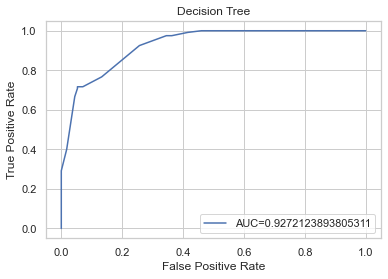

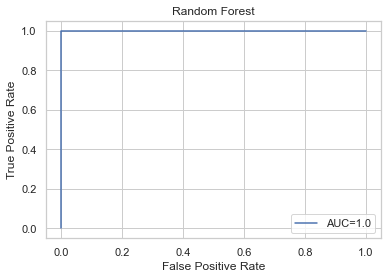

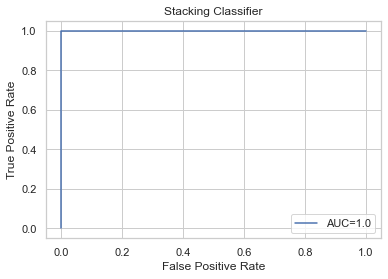

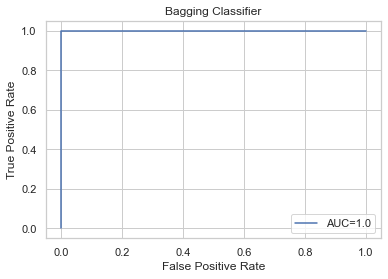

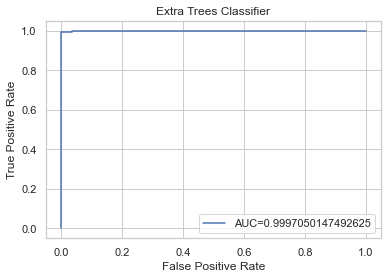

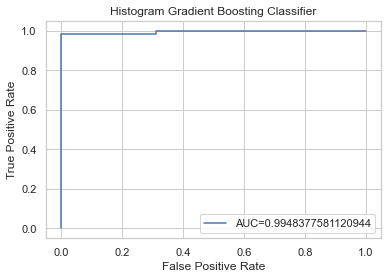

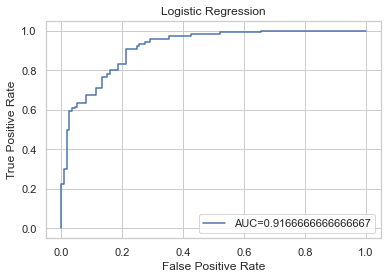

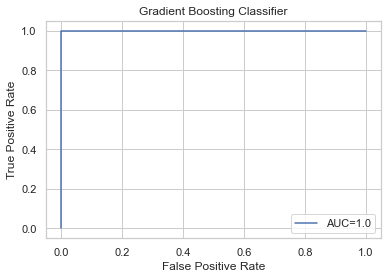

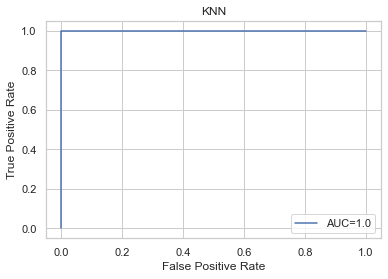

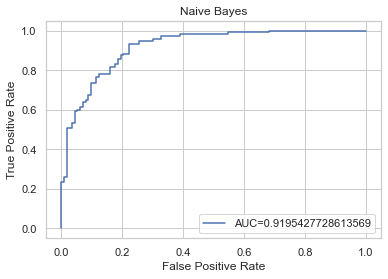

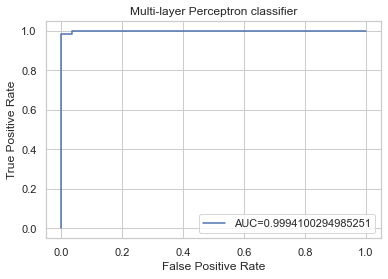

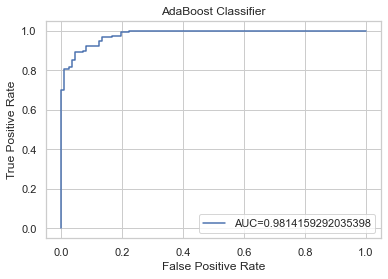

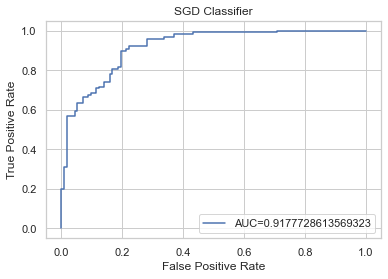

In [226]:
for m in range(len(models)):
    roc_auc(models[m], model_names[m])

### Regularization

In [194]:
def jitter(X, scale=0.1):
    return X + np.random.normal(0, scale, X.shape)

def jitter_test(classifier, X, y, scales = np.linspace(0, 0.5, 30), N = 5):
    out = []
    for s in scales:
        avg = 0.0
        for r in range(N):
            avg += accuracy_score(y, classifier.predict(jitter(X, s)))
        out.append(avg / N)
    return out, scales

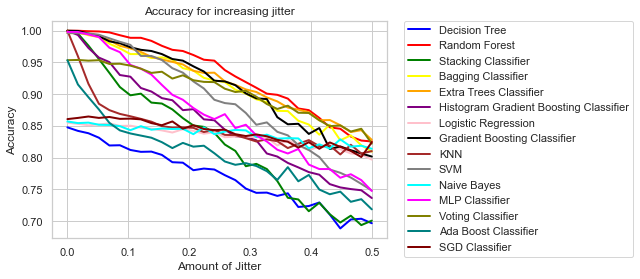

In [195]:
# Apply jitter to all the models with tuned hyper parameters
dtc_scores, jitters = jitter_test(model_grid_search_dtc_rs, X_train, y_train)
rf_scores, jitters = jitter_test(model_grid_search_rf_rs, X_train, y_train)
sc_scores, jitters = jitter_test(model_grid_search_sc_rs, X_train, y_train)
bc_scores, jitters = jitter_test(model_grid_search_bc_rs, X_train, y_train)
etc_scores, jitters = jitter_test(model_grid_search_etc_rs, X_train, y_train)
hgbc_scores, jitters = jitter_test(model_grid_search_hgbc_rs, X_train, y_train)
lreg_scores, jitters = jitter_test(model_grid_search_lreg_rs, X_train, y_train)
gbc_scores, jitters = jitter_test(model_grid_search_gbc_rs, X_train, y_train)
knc_scores, jitters = jitter_test(model_grid_search_knc_rs, X_train, y_train)
svc_scores, jitters = jitter_test(model_grid_search_svc_rs, X_train, y_train)
gnb_scores, jitters = jitter_test(model_grid_search_gnb_rs, X_train, y_train)
mlpc_scores, jitters = jitter_test(model_grid_search_mlpc_rs, X_train, y_train)
vc_scores, jitters = jitter_test(model_grid_search_vc_rs, X_train, y_train)
abc_scores, jitters = jitter_test(model_grid_search_abc_rs, X_train, y_train)
sgdc_scores, jitters = jitter_test(model_grid_search_sgdc_rs, X_train, y_train)

# Plotting all models scores
plt.figure()
lw = 2
plt.plot(jitters, dtc_scores, color='blue', lw=lw, label='Decision Tree')
plt.plot(jitters, rf_scores, color='red', lw=lw, label='Random Forest')
plt.plot(jitters, sc_scores, color='green', lw=lw, label='Stacking Classifier')
plt.plot(jitters, bc_scores, color='yellow', lw=lw, label='Bagging Classifier')
plt.plot(jitters, etc_scores, color='orange', lw=lw, label='Extra Trees Classifier')
plt.plot(jitters, hgbc_scores, color='purple', lw=lw, label='Histogram Gradient Boosting Classifier')
plt.plot(jitters, lreg_scores, color='pink', lw=lw, label='Logistic Regression')
plt.plot(jitters, gbc_scores, color='black', lw=lw, label='Gradient Boosting Classifier')
plt.plot(jitters, knc_scores, color='brown', lw=lw, label='KNN')
plt.plot(jitters, svc_scores, color='grey', lw=lw, label='SVM')
plt.plot(jitters, gnb_scores, color='cyan', lw=lw, label='Naive Bayes')
plt.plot(jitters, mlpc_scores, color='magenta', lw=lw, label='MLP Classifier')
plt.plot(jitters, vc_scores, color='olive', lw=lw, label='Voting Classifier')
plt.plot(jitters, abc_scores, color='teal', lw=lw, label='Ada Boost Classifier')
plt.plot(jitters, sgdc_scores, color='maroon', lw=lw, label='SGD Classifier')

plt.xlabel('Amount of Jitter')
plt.ylabel('Accuracy')
plt.title('Accuracy for increasing jitter')
#legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [196]:
# get a dataframe with jitter score at 0.3
jitter_df = pd.DataFrame({'jitter': jitters, 'dtc': dtc_scores, 'rf': rf_scores, 'sc': sc_scores, 'bc': bc_scores, 'etc': etc_scores, 'hgbc': hgbc_scores, 'lreg': lreg_scores, 'gbc': gbc_scores, 'knc': knc_scores, 'svc': svc_scores, 'gnb': gnb_scores, 'mlpc': mlpc_scores, 'vc': vc_scores, 'abc': abc_scores, 'sgdc': sgdc_scores})
jitter_df
#get the jitter value closest to 0.3
jitter_value = jitter_df.iloc[(jitter_df['jitter']-0.3).abs().argsort()[:1]]
# transpose the dataframe
jitter_value = jitter_value.T
# drop the jitter column
jitter_value = jitter_value.drop('jitter')
# rename the column
jitter_value = jitter_value.rename(columns={jitter_value.columns[0]: 'Score'})
# sort the values
jitter_value = jitter_value.sort_values(by=['Score'], ascending=False)
jitter_value
# replace the index with the model name
names = {'rf': 'Random Forest Classifier',
        'etc': 'Extra Trees Classifier', 
        'sc': 'Stacking Classifier', 
        'svc': 'Support Vector Machine Classifier',
        'vc': 'Voting Classifier',
        'knc': 'KNN Classifier',
        'bc': 'Bagging Classifier',
        'mlpc': 'Multi-layer Perceptron Classifier',
        'hgbc': 'Histogram Gradient Boosting Classifier',
        'gbc': 'Gradient Boosting Classifier',
        'dtc': 'Decision Tree Classifier',
        'lreg': 'Logistic Regression',
        'abc': 'Ada Boost Classifier',
        'sgdc': 'SGD Classifier',
        'gnb': 'Naive Bayes'}
# get a list of index
index = jitter_value.index.tolist()
# replace the index with the dictionary
jitter_value.index = [names[i] for i in index]
jitter_value
# jitter_value

,Score
Random Forest Classifier,0.919109
Extra Trees Classifier,0.907607
Voting Classifier,0.905380
Gradient Boosting Classifier,0.901299
Bagging Classifier,0.900928
Support Vector Machine Classifier,0.870501
Multi-layer Perceptron Classifier,0.851948
Naive Bayes,0.843043
SGD Classifier,0.834137
Logistic Regression,0.833024


In [239]:
# Select the best model
best_model = jitter_value.index[0]
print('The best model is: ', best_model)
# Get the index and find the model in models list
index_name = model_names.index(best_model)
model = models[index_name]
model

The best model is:  Random Forest Classifier


RandomForestClassifier(max_depth=91, min_samples_split=3, n_estimators=301,
                       random_state=15)

In [240]:
# Predict using the best model
y_pred = model.predict(test_data)

In [241]:
# Create a submission file
submission = pd.DataFrame({'PatientID': test_data.index, 'Disease': y_pred})
submission.to_csv('submission.csv', index = False)